In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
hotel = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Cluster Analysis\\Hotel\\hotel.csv")
hotel.head()

,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id.1,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,11/3/2014 16:02,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,3/13/2013 19:25,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,10/13/2014 13:20,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,11/5/2013 10:40,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,6/10/2014 13:34,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


## Section 1
### Missing Data

In [3]:
hotel.isnull().sum()

user_id                          0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id.1                        0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

Mean : 1960.662   and Median : 1131.835


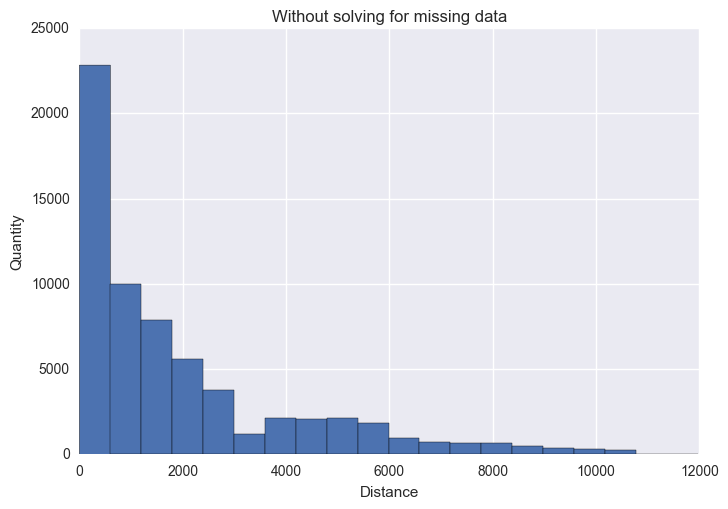

In [4]:
hotel['orig_destination_distance'].hist(bins=20)
plt.title("Without solving for missing data")
plt.xlabel("Distance")
plt.ylabel("Quantity")
plt.savefig('distance_missing.png')
print("Mean : %.3f   and Median : %.3f" %(hotel['orig_destination_distance'].mean(),hotel['orig_destination_distance'].median()))

In [5]:
hotel['orig_destination_distance'].describe()

count    63915.000000
mean      1960.661721
std       2228.153377
min          0.005600
25%        312.792100
50%       1131.835300
75%       2542.359350
max      11965.376100
Name: orig_destination_distance, dtype: float64

count    100000.000000
mean       1960.661721
std        1781.333573
min           0.005600
25%         745.574000
50%        1960.661721
75%        1960.661721
max       11965.376100
Name: orig_destination_distance, dtype: float64
Mean : 1960.662   and Median : 1960.662


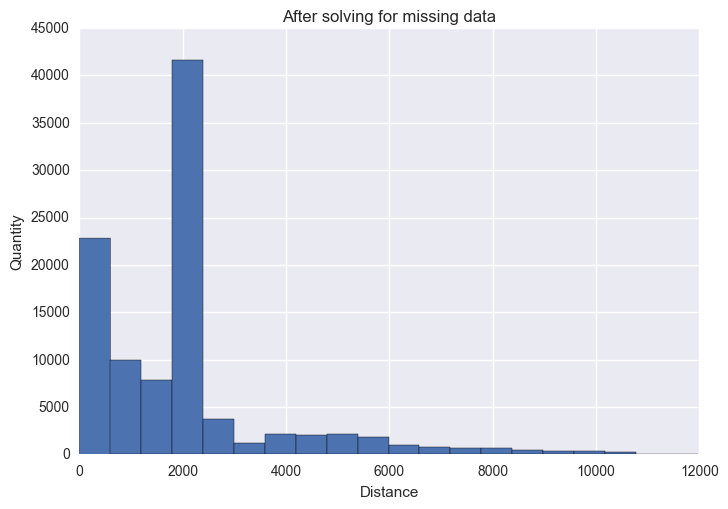

In [6]:
distance_mean = hotel['orig_destination_distance'].mean()
hotel['orig_destination_distance'] = hotel['orig_destination_distance'].fillna(distance_mean)
print(hotel['orig_destination_distance'].describe())
hotel['orig_destination_distance'].hist(bins=20)
plt.title("After solving for missing data")
plt.xlabel("Distance")
plt.ylabel("Quantity")
plt.savefig('distance_solvedmissing.png')
print("Mean : %.3f   and Median : %.3f" %(hotel['orig_destination_distance'].mean(),hotel['orig_destination_distance'].median()))

In [7]:
#2. srch_co and srch_ci --> these are dates, so we can just drop them
hotel.dropna(inplace=True)

In [8]:
hotel.shape

(99878, 25)

## Section 2

### EDA and Feature Engineering

In [9]:
#function to print the distributions of Categorical features.
def column_distributions(dff, col):
    df = dff[col].value_counts()
    df = pd.DataFrame(df)
    df['Percentage'] = df.apply(lambda x: x/x.sum())
    print(df)
    
    plt.figure(figsize=[7,4])
    df['Percentage'].plot(kind='bar', rot=0, alpha=0.6, color=np.random.rand(3,1))
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.title("Distribution of '%s' feature" %(col))

   is_booking  Percentage
0       91885    0.919972
1        7993    0.080028


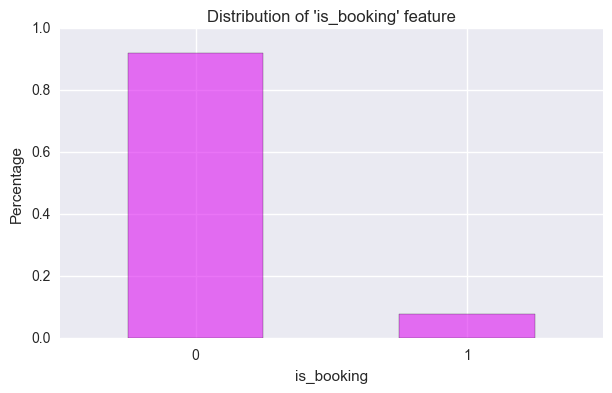

In [10]:
#1. booking
booking_dist = column_distributions(hotel,'is_booking')
plt.savefig('dist_isbooking.png')

   is_mobile  Percentage
0      86529    0.866347
1      13349    0.133653


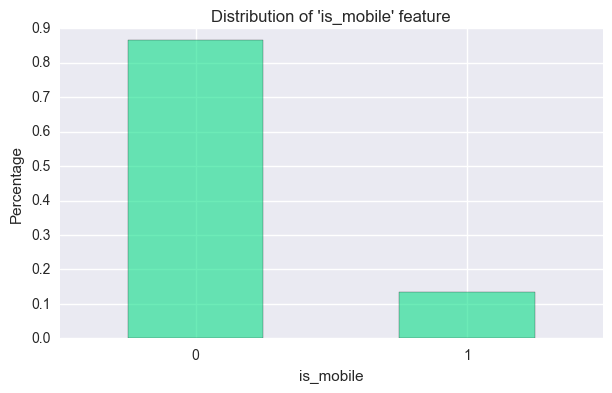

In [11]:
#2. mobile use feature
mobile_use = column_distributions(hotel,'is_mobile')
plt.savefig('dist_ismobile.png')

   is_package  Percentage
0       75079    0.751707
1       24799    0.248293


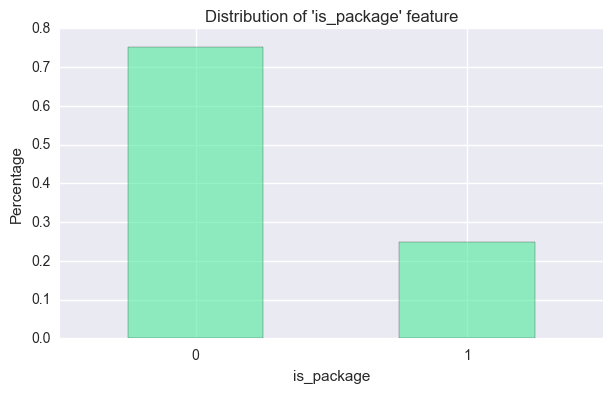

In [12]:
#3. package use feature
package_use = column_distributions(hotel,'is_package')
plt.savefig('dist_ispack.png')

    channel  Percentage
9     55314    0.553816
0     12474    0.124892
1     10258    0.102705
2      7827    0.078366
5      6155    0.061625
3      4400    0.044054
4      2192    0.021947
7       810    0.008110
8       271    0.002713
6       162    0.001622
10       15    0.000150


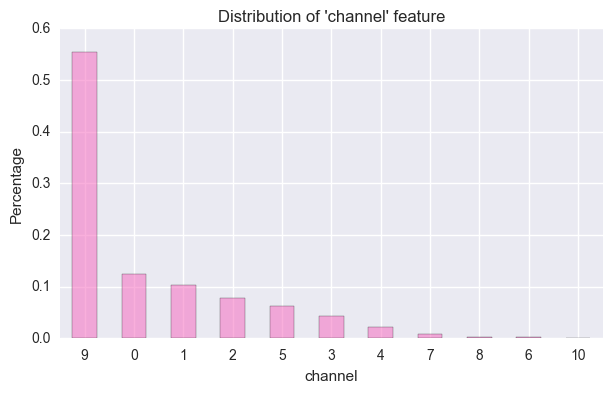

In [13]:
#4. channel use feature
channel_use = column_distributions(hotel,'channel')
plt.savefig('dist_channel.png')

   srch_adults_cnt  Percentage
2            65449    0.655289
1            21542    0.215683
3             5413    0.054196
4             5289    0.052955
6              861    0.008621
5              739    0.007399
8              225    0.002253
0              180    0.001802
7              141    0.001412
9               39    0.000390


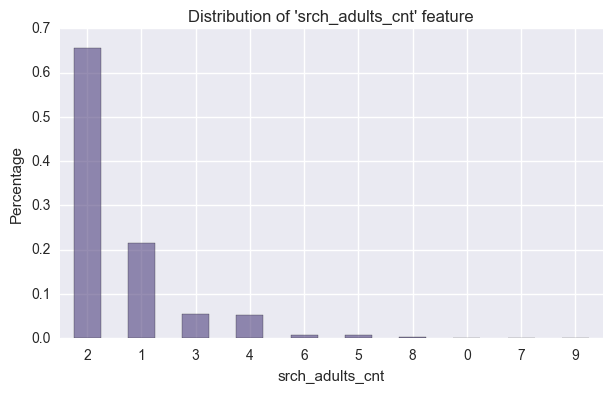

In [14]:
#5. srch_adults_cnt
adults_cnt = column_distributions(hotel,'srch_adults_cnt')
plt.savefig('dist_adults.png')

   srch_children_cnt  Percentage
0              78639    0.787351
1              11282    0.112958
2               8133    0.081429
3               1358    0.013597
4                366    0.003664
5                 51    0.000511
6                 36    0.000360
7                  6    0.000060
8                  4    0.000040
9                  3    0.000030


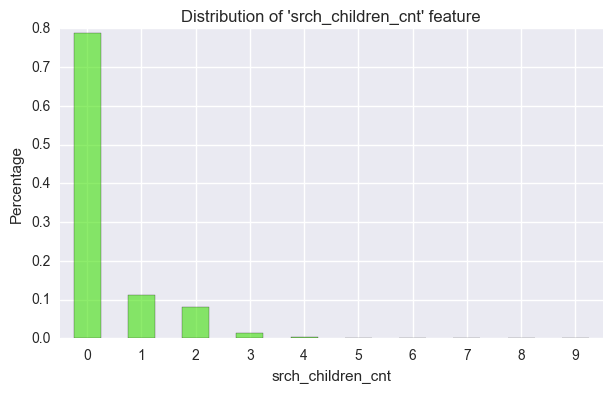

In [15]:
#6. srch_children_cnt
child_cnt = column_distributions(hotel,'srch_children_cnt')
plt.savefig('dist_child.png')

   srch_rm_cnt  Percentage
1        91553    0.916648
2         6671    0.066791
3         1076    0.010773
4          295    0.002954
5          117    0.001171
8           68    0.000681
6           67    0.000671
7           30    0.000300
0            1    0.000010


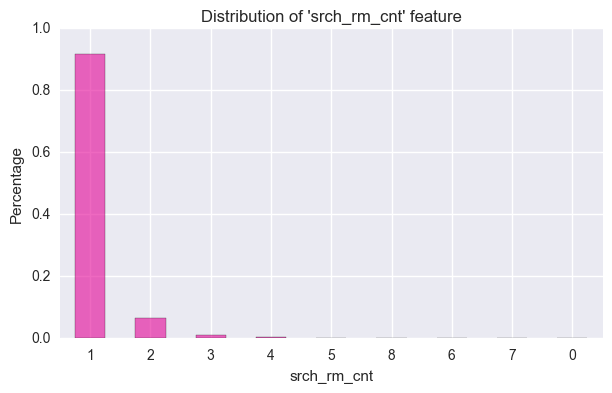

In [16]:
#7. srch_rm_cnt
room_cnt = column_distributions(hotel,'srch_rm_cnt')
plt.savefig('dist_rm.png')

In [18]:
hotel['srch_co'] = pd.to_datetime(hotel['srch_co'])
hotel['srch_ci'] = pd.to_datetime(hotel['srch_ci'])
hotel['date_time'] = pd.to_datetime(hotel['date_time'])
hotel['date'] = pd.to_datetime(hotel['date_time'].apply(lambda x: x.date()))

def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

hotel['duration'] = hotel.apply(duration, axis=1)
hotel['days_in_advance'] = hotel.apply(days_in_advance, axis=1)

In [19]:
def distribution_numerical(dff,col):
    print(dff[col].describe())
    
    plt.figure(figsize=[16,5])
    plt.subplot(121)
    dff[col].hist(bins=50)
    plt.ylabel("Total")
    plt.xlabel(col)
    plt.title("'%s' feature - Histogram" %(col))
    
    
    
    plt.subplot(122)
    sns.boxplot(y=dff[col])
    plt.title("'%s' feature - Boxplot" %(col))
    

In [20]:
hotel.isnull().sum()

user_id                        0
date_time                      0
site_name                      0
posa_continent                 0
user_location_country          0
user_location_region           0
user_location_city             0
orig_destination_distance      0
user_id.1                      0
is_mobile                      0
is_package                     0
channel                        0
srch_ci                        0
srch_co                        0
srch_adults_cnt                0
srch_children_cnt              0
srch_rm_cnt                    0
srch_destination_id            0
srch_destination_type_id       0
is_booking                     0
cnt                            0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_cluster                  0
date                           0
duration                     382
days_in_advance               25
dtype: int64

count    99853.000000
mean        55.258360
std         65.714297
min          0.000000
25%         10.000000
50%         31.000000
75%         76.000000
max        497.000000
Name: days_in_advance, dtype: float64


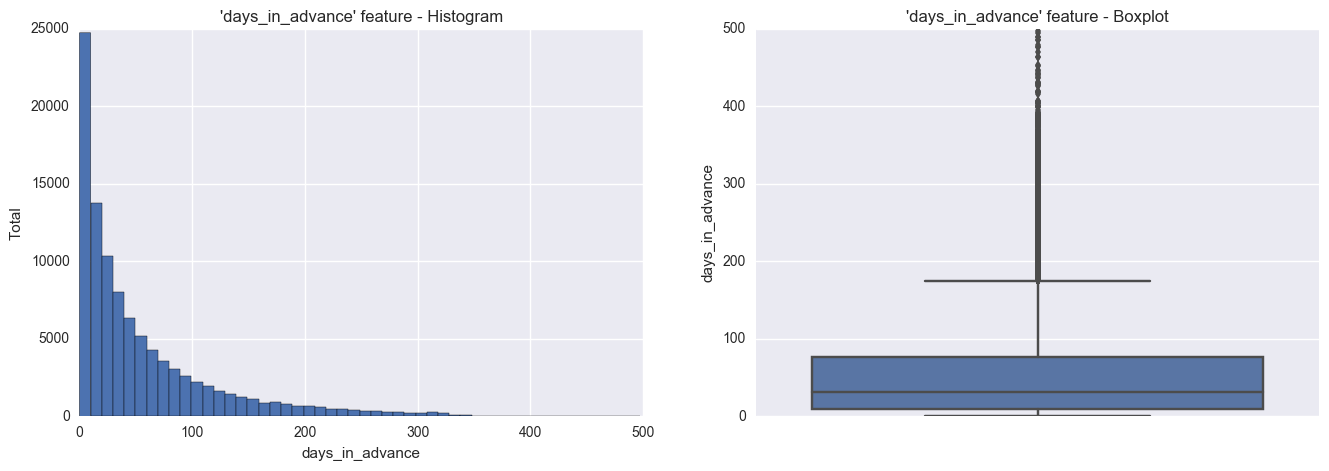

In [21]:
distribution_numerical(hotel,'days_in_advance')
plt.savefig('dist_daysadvance_hist.png')

count    99496.000000
mean         3.388960
std          3.054454
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        196.000000
Name: duration, dtype: float64


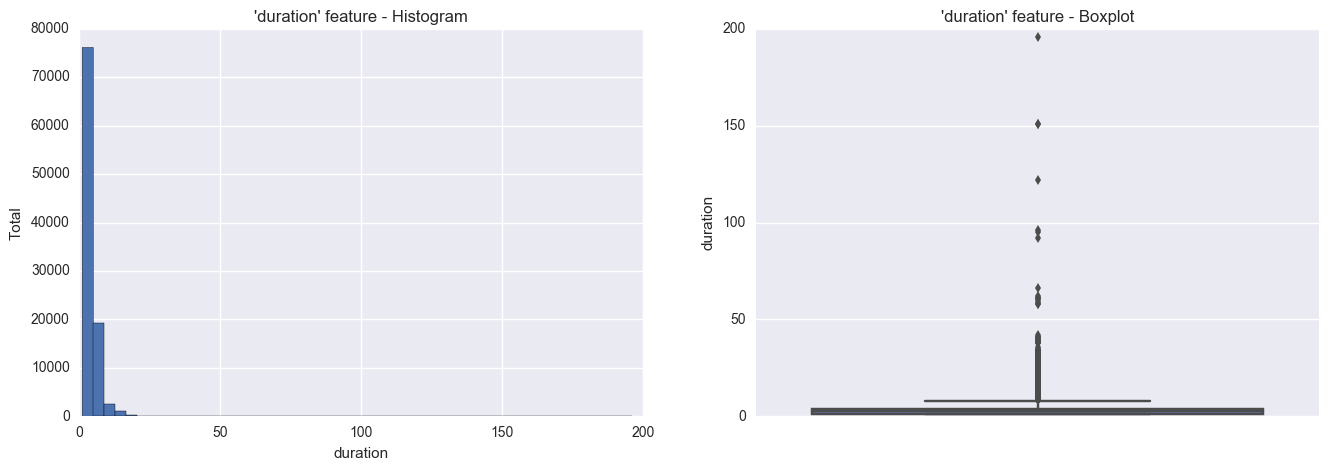

In [22]:
distribution_numerical(hotel,'duration')
plt.savefig('dist_duration_hist.png')

count    99878.000000
mean      1960.732491
std       1781.185380
min          0.005600
25%        746.251900
50%       1960.661721
75%       1960.661721
max      11965.376100
Name: orig_destination_distance, dtype: float64


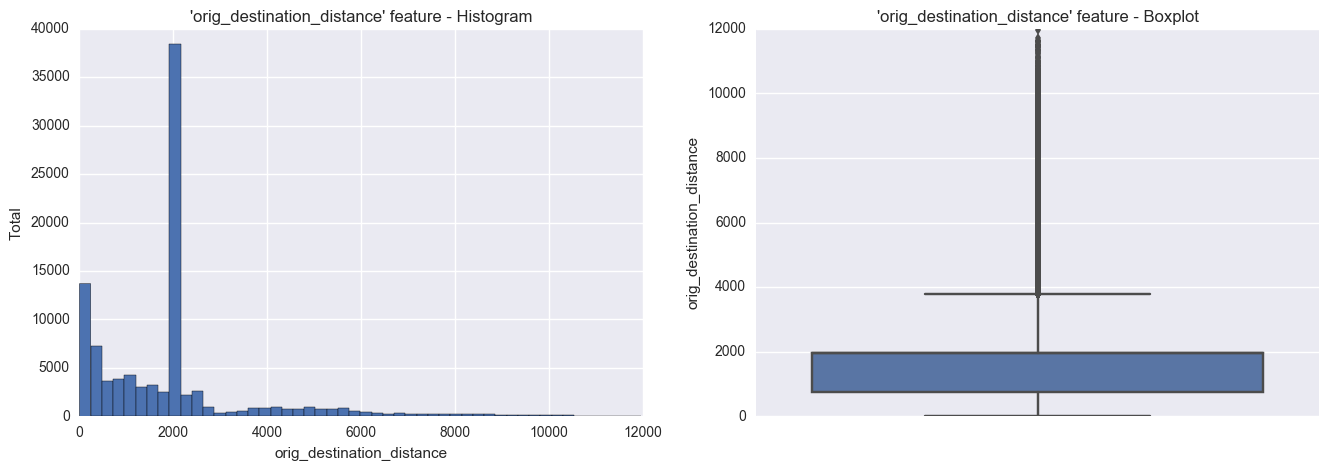

In [23]:
distribution_numerical(hotel,'orig_destination_distance')
plt.savefig('dist_distance_hist.png')

count    99853.000000
mean        52.301473
std         56.340153
min          0.000000
25%         10.000000
50%         31.000000
75%         76.000000
max        200.000000
Name: days_in_advance, dtype: float64


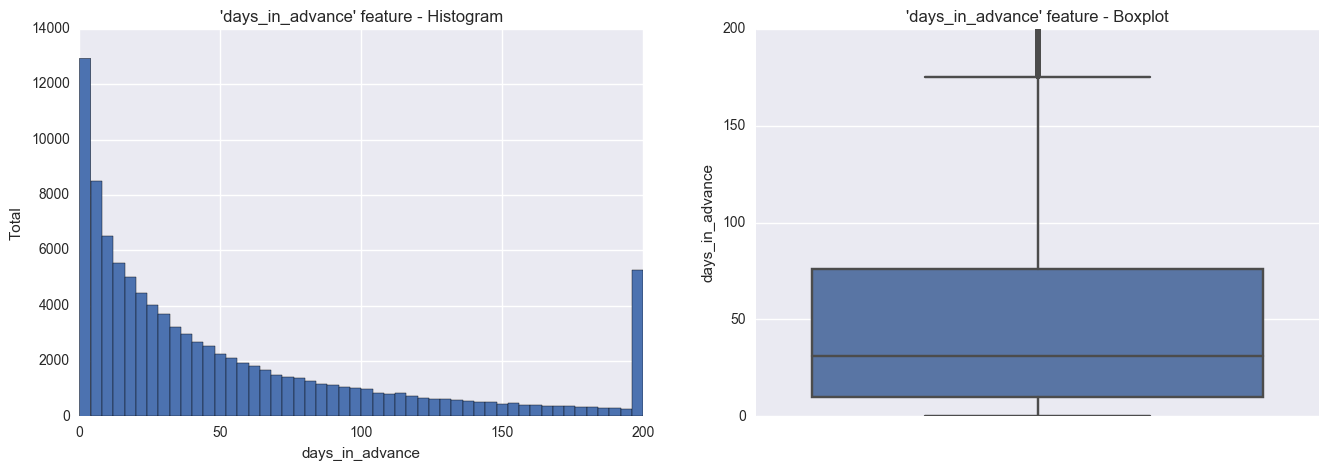

In [25]:
high = hotel['days_in_advance'].quantile(0.95)

def imputer(value):
    
    if value > high:
        return high
    else:
        return value

hotel['days_in_advance'] = hotel['days_in_advance'].apply(imputer)
distribution_numerical(hotel,'days_in_advance')
plt.savefig("daysadvance_imputed.png")

count    99496.000000
mean         3.192058
std          2.112688
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: duration, dtype: float64


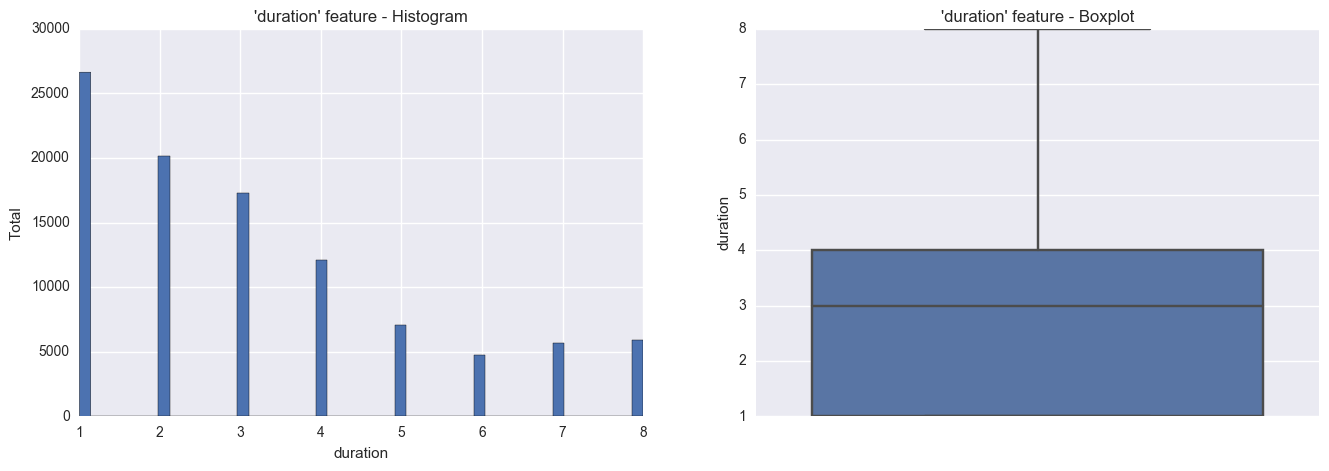

In [26]:
high1 = hotel['duration'].quantile(0.95)

def imputer1(value):
    
    if value > high1:
        return high1
    else:
        return value

hotel['duration'] = hotel['duration'].apply(imputer1)
distribution_numerical(hotel,'duration')
plt.savefig("duration_imputed.png")

count    99878.000000
mean      1867.861068
std       1477.711322
min          0.005600
25%        746.251900
50%       1960.661721
75%       1960.661721
max       5786.247865
Name: orig_destination_distance, dtype: float64


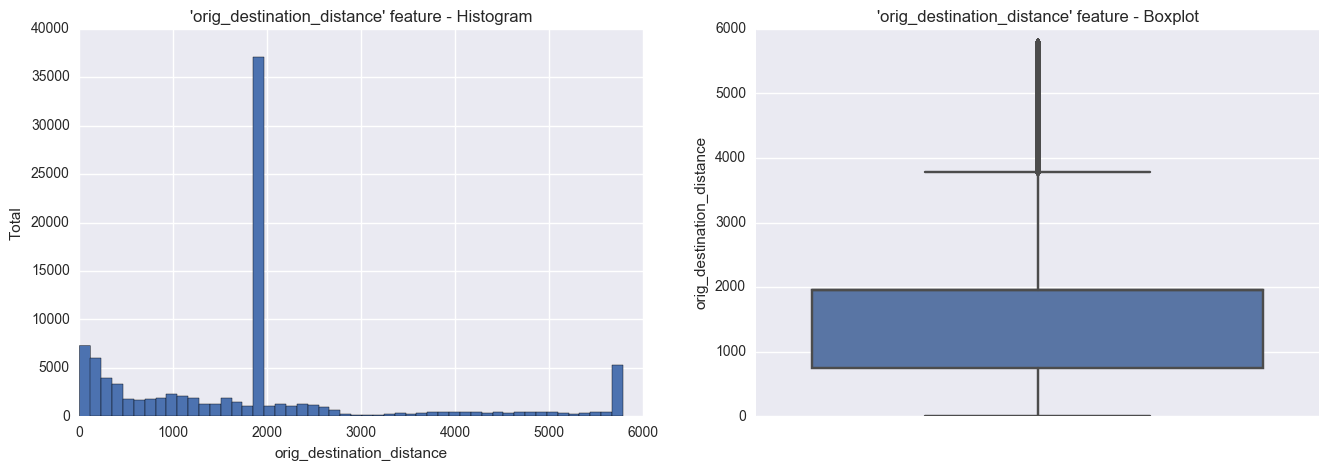

In [27]:
high2 = hotel['orig_destination_distance'].quantile(0.95)

def imputer2(value):
    
    if value > high2:
        return high2
    else:
        return value

hotel['orig_destination_distance'] = hotel['orig_destination_distance'].apply(imputer2)
distribution_numerical(hotel,'orig_destination_distance')
plt.savefig("distance_imputed.png")

In [29]:
'''
Target Variable: "is_booking" ---> find probabily of booking for other factors
'''
def proba_booking(dff,col):
    temp2 = dff.pivot_table(values='is_booking',index=[col],aggfunc=lambda x: x.mean())
    
    print(temp2)
    temp2.plot(kind = 'bar', rot=0, alpha=0.6, color=np.random.rand(3,1))
    plt.xlabel('%s' %(col))
    plt.ylabel('Probability of booking')
    plt.title("Probability of booking by %s" %(col))

is_mobile
0    0.083070
1    0.060304
Name: is_booking, dtype: float64


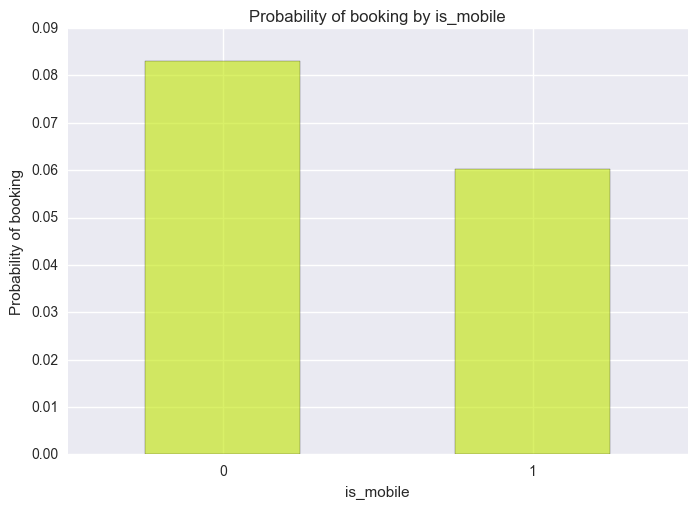

In [30]:
#1. is_mobile
mobile_booking = proba_booking(hotel,'is_mobile')
plt.savefig('prob_mobile.png')

is_package
0    0.092729
1    0.041574
Name: is_booking, dtype: float64


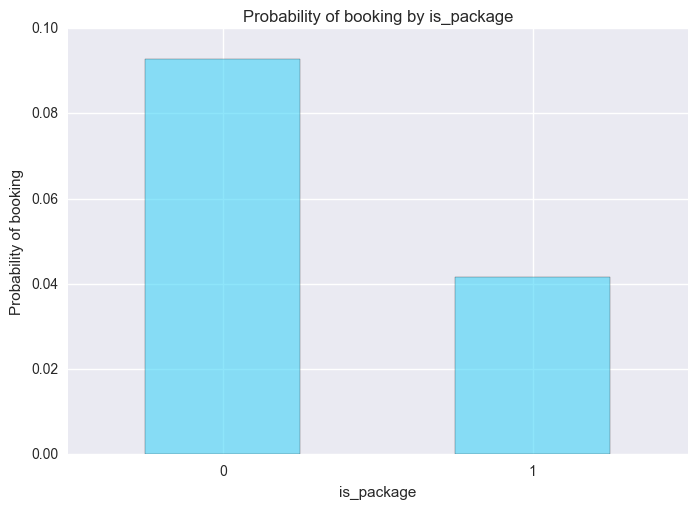

In [31]:
#2. is_package
pack_booking = proba_booking(hotel,'is_package')
plt.savefig('prob_package.png')

channel
0     0.072230
1     0.069799
2     0.060560
3     0.060455
4     0.120894
5     0.094395
6     0.067901
7     0.043210
8     0.055351
9     0.085439
10    0.200000
Name: is_booking, dtype: float64


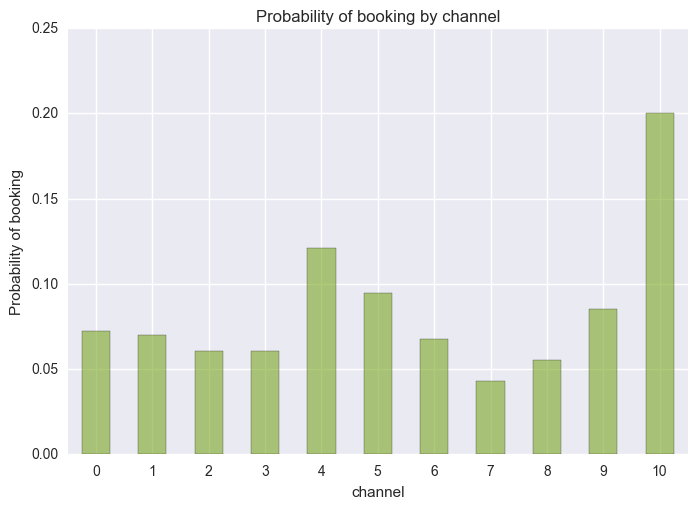

In [32]:
#3. channels
channel_booking = proba_booking(hotel,'channel')
plt.savefig('prob_channels.png')

srch_adults_cnt
0    0.072222
1    0.122134
2    0.068511
3    0.066137
4    0.070902
5    0.048714
6    0.061556
7    0.092199
8    0.106667
9    0.153846
Name: is_booking, dtype: float64


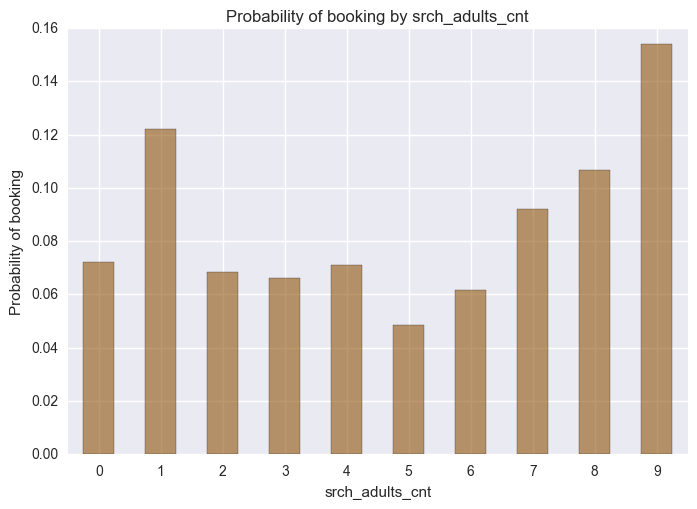

In [33]:
#3. Adults
adults_booking = proba_booking(hotel,'srch_adults_cnt')
plt.savefig('prob_adults.png')

srch_children_cnt
0    0.082465
1    0.083850
2    0.055945
3    0.054492
4    0.065574
5    0.078431
6    0.055556
7    0.333333
8    0.000000
9    0.333333
Name: is_booking, dtype: float64


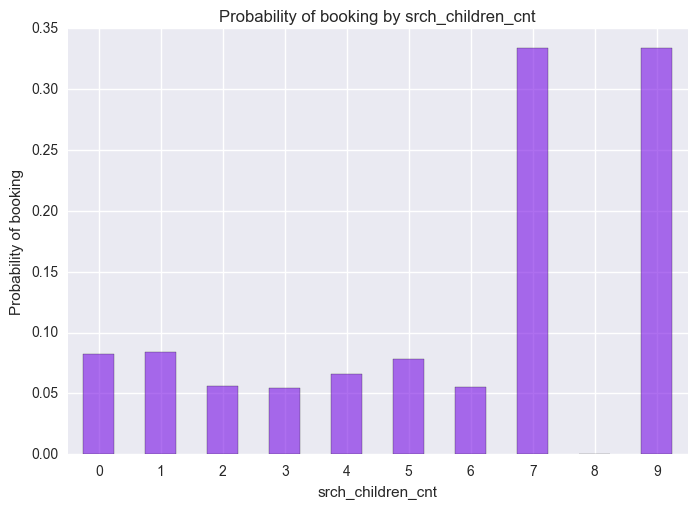

In [34]:
#3. children
child_booking = proba_booking(hotel,'srch_children_cnt')
plt.savefig('prob_children.png')

srch_rm_cnt
0    1.000000
1    0.079167
2    0.086943
3    0.094796
4    0.142373
5    0.076923
6    0.089552
7    0.033333
8    0.058824
Name: is_booking, dtype: float64


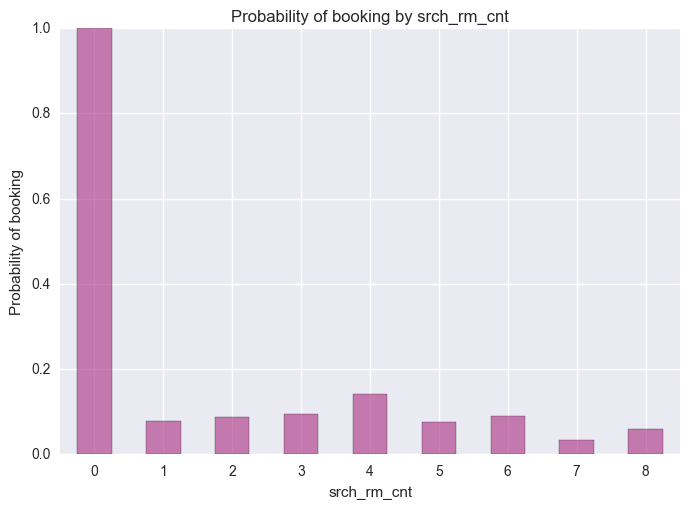

In [35]:
#3. room
room_booking = proba_booking(hotel,'srch_rm_cnt')
plt.savefig('prob_room.png')

In [36]:
hotel.dropna(inplace = True)

## Section 3


### Marketing Channels

In [37]:
# booking rate per channel
print(hotel.groupby('channel')['is_booking']\
    .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})\
    .reset_index())
print("")
print("Mean booking rate: {0}".format(hotel['is_booking'].mean()))

    channel  num_of_bookings  booking_rate
0         0              901      0.072603
1         1              715      0.070029
2         2              474      0.060769
3         3              266      0.060675
4         4              265      0.121226
5         5              581      0.094625
6         6               11      0.067901
7         7               35      0.043587
8         8               15      0.055762
9         9             4725      0.085766
10       10                3      0.200000

Mean booking rate: 0.08033497200188999


In [38]:
def stats_comparison(df,i):
    df.groupby(i)['is_booking'].agg({
    'average': 'mean',
    'bookings': 'count'
    }).reset_index()
    
    cat = df.groupby(i)['is_booking']\
        .agg({
            'sub_average': 'mean',
            'sub_bookings': 'count'
       }).reset_index()
        
    cat['overall_average'] = df['is_booking'].mean()
    cat['overall_bookings'] = df['is_booking'].count()
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] \
                     - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    
    cat['ttest'] = (cat['sub_average']-cat['rest_average'])/ \
                     np.sqrt(cat['overall_average']*(1-cat['overall_average']) * (1/cat['sub_bookings']+1/cat['rest_bookings']))
        
    cat['prob'] = np.around(stats.norm.cdf(cat.ttest), decimals = 4)
    
    cat['significant'] = [(lambda x: 'Out-performing' if x > 0.90 else 'Under-performing' if x < 0.10 else 0)(i) for i in cat['prob']]
    cat = pd.DataFrame(cat)
    cat = cat[['channel','sub_average','rest_average','ttest','prob','significant']]
    print(cat)
    
stats_comparison(hotel,'channel')

    channel  sub_average  rest_average     ttest    prob       significant
0         0     0.072603      0.081437 -3.387350  0.0004  Under-performing
1         1     0.070029      0.081514 -4.044230  0.0000  Under-performing
2         2     0.060769      0.082000 -6.622298  0.0000  Under-performing
3         3     0.060675      0.081241 -4.898179  0.0000  Under-performing
4         4     0.121226      0.079416  7.112316  1.0000    Out-performing
5         5     0.094625      0.079395  4.253023  1.0000    Out-performing
6         6     0.067901      0.080355 -0.582701  0.2800                 0
7         7     0.043587      0.080634 -3.846709  0.0001  Under-performing
8         8     0.055762      0.080402 -1.484750  0.0688  Under-performing
9         9     0.085766      0.073593  7.020838  1.0000    Out-performing
10       10     0.200000      0.080317  1.705212  0.9559    Out-performing


In [39]:
import pymc

@pymc.stochastic(dtype=np.float64)
def hyperpriors(value=[1.0, 1.0]):
    a, b = value[0], value[1]
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

a = hyperpriors[0]
b = hyperpriors[1]

# This is what we don't know, but would like to find out
true_rates = pymc.Beta('true_rates', a, b, size=4)

# This is what we observed
trials = np.array([2192, 6155, 55314, 15])
successes = np.array([265, 581, 4726, 3])
observed_values = pymc.Binomial('observed_values', trials, true_rates, observed=True, value=successes)

model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

# Generate 1M samples, and throw out the first 500k
mcmc.sample(1000000, 500000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 160.5 sec               0%                  ] 7302 of 1000000 complete in 1.0 sec

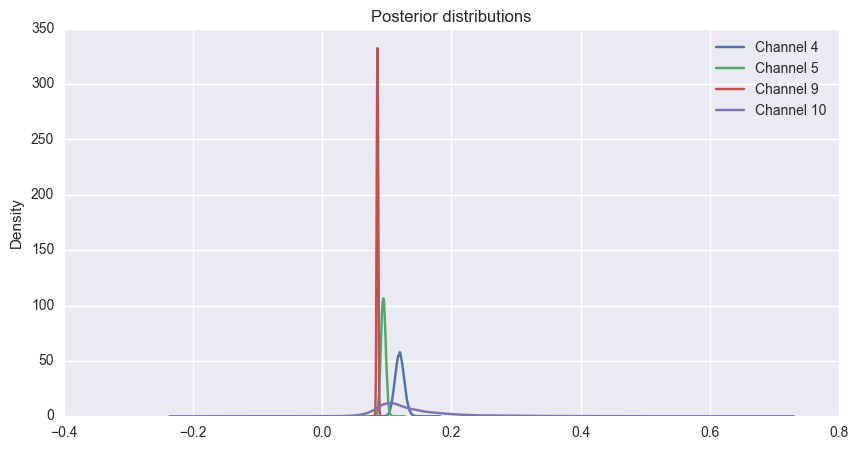

In [40]:
import seaborn as sns

a = mcmc.trace('true_rates')[:][:,0]
a = pd.Series(a)
b = mcmc.trace('true_rates')[:][:,1]
b = pd.Series(b)
c = mcmc.trace('true_rates')[:][:,2]
c = pd.Series(c)
d = mcmc.trace('true_rates')[:][:,3]
d = pd.Series(d)
plt.figure(figsize=[10,5])
a.plot(kind='kde', label='Channel 4')
b.plot(kind='kde',label='Channel 5')
c.plot(kind='kde',label='Channel 9')
d.plot(kind='kde',label='Channel 10')
plt.legend()
plt.title("Posterior distributions")
plt.show()
plt.savefig("density_ab.png")

In [41]:
diff_12 = mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,1]
print("Probability that Channel 4 gets > Channel 5: %0.3f" % (diff_12 < 0).mean())
print("Probability that Channel 4 gets < Channel 5: %0.3f" % (diff_12 > 0).mean())
print("")
diff_34 = mcmc.trace('true_rates')[:][:,2] - mcmc.trace('true_rates')[:][:,3]
print("Probability that Channel 9 > Channel 10: %0.3f" % (diff_34 < 0).mean())
print("Probability that Channel 9 < Channel 10: %0.3f" % (diff_34 > 0).mean())



Probability that Channel 4 gets > Channel 5: 0.000
Probability that Channel 4 gets < Channel 5: 1.000

Probability that Channel 9 > Channel 10: 0.883
Probability that Channel 9 < Channel 10: 0.117


In [42]:
diff_59 = mcmc.trace('true_rates')[:][:,1] - mcmc.trace('true_rates')[:][:,2]
print("Probability that Channel 5 > Channel 9: %0.3f" % (diff_59 < 0).mean())
print("Probability that Channel 5 < Channel 9: %0.3f" % (diff_59 > 0).mean())


Probability that Channel 5 > Channel 9: 0.008
Probability that Channel 5 < Channel 9: 0.992


In [43]:
diff_410 = mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,3]
print("Probability that Channel 4 > Channel 10: %0.3f" % (diff_410 < 0).mean())
print("Probability that Channel 4 < Channel 10: %0.3f" % (diff_410 > 0).mean())


Probability that Channel 4 > Channel 10: 0.514
Probability that Channel 4 < Channel 10: 0.486


## Section 4
### 4.1 K-Means Clustering - optimal 'k'

In [45]:
hotel.dropna(inplace=True)

In [46]:
num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt','is_booking','channel']

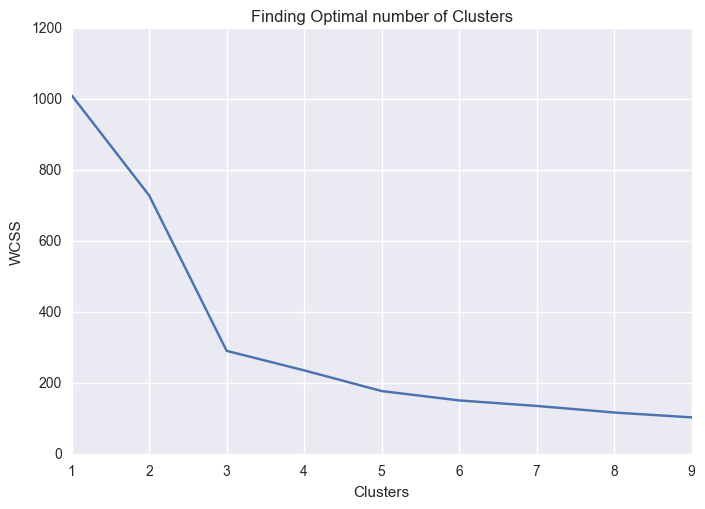

In [47]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandist = []
from sklearn.cluster import KMeans
for i in clusters:
    model = KMeans(n_clusters = i)
    model.fit(hotel[num_list])
    model_pred = model.predict(hotel[num_list])
    meandist.append(sum(np.min(cdist(hotel[num_list], model.cluster_centers_, 'euclidean'), axis=1))/ hotel[num_list].shape[0])
    
plt.plot(clusters, meandist)
plt.ylabel("WCSS")
plt.xlabel("Clusters")
plt.title("Finding Optimal number of Clusters")
plt.savefig("WCSS_k.png")

In [48]:
# Step 3: select clustering method and number of clusters
# The Elbow methods? choose a K so that the sum of the square error of the distances decrease drastically
# using an ad-hoc k=3 here, there are methods to help derive the optimal number for k
import time

X = hotel[num_list].copy()
from sklearn import preprocessing
for i in num_list:
    X[i] = preprocessing.scale(X[i])

km = cluster.KMeans(n_clusters=3, max_iter=1000, random_state=0)
start = time.time()
km.fit_predict(X)
end = time.time()
model_time = end - start

hotel['cluster'] = km.predict(X)

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning:

Data with input dtype int64 was converted to float64 by the scale function.



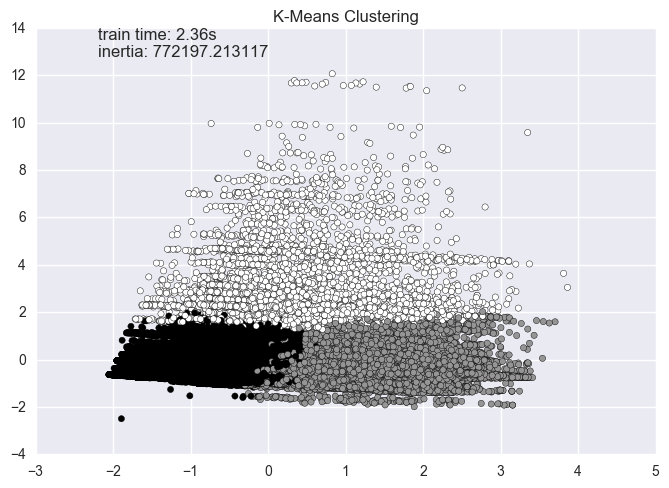

In [49]:
# Principal Component Analysis
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X)
hotel['x'] = pca.fit_transform(X)[:, 0]
hotel['y'] = pca.fit_transform(X)[:, 1]
plt.scatter(hotel['x'], hotel['y'], c=hotel['cluster'])
plt.title("K-Means Clustering")
plt.text(-2.2, 12.8,  'train time: %.2fs\ninertia: %f' % (
    model_time, km.inertia_))

plt.savefig("kmeans.png")

### 4.2 descriptive analysis of all clusters

In [50]:
clusters_profile = hotel.groupby('cluster')[num_list].mean()
print(clusters_profile)

         duration  days_in_advance  orig_destination_distance  is_mobile  \
cluster                                                                    
0        2.999710        57.509344                1801.980368   0.116616   
1        5.027701        89.151214                2454.727678   0.151070   
2        2.121801        29.624050                1524.909464   0.125024   

         is_package  srch_adults_cnt  srch_children_cnt  srch_rm_cnt  \
cluster                                                                
0          0.172534         4.238012           0.641026     2.369549   
1          0.630648         1.908530           0.330188     1.020320   
2          0.024646         1.823150           0.303666     1.016890   

         is_booking   channel  
cluster                        
0          0.077937  6.024917  
1          0.026341  5.650274  
2          0.112770  5.969201  


In [51]:
cluster_0 = hotel[hotel['cluster'] == 0]
cluster_1 = hotel[hotel['cluster'] == 1]
cluster_2 = hotel[hotel['cluster'] == 2]

In [52]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)

(6903, 31)
(34547, 31)
(58021, 31)


### Cluster 0

In [53]:
cluster_0[num_list].describe()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,channel
count,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000,6903.000000
mean,2.999710,57.509344,1801.980368,0.116616,0.172534,4.238012,0.641026,2.369549,0.077937,6.024917
std,1.945133,56.843180,1428.234515,0.320985,0.377871,1.391802,1.161568,1.001468,0.268092,3.590243
min,1.000000,0.000000,0.037400,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,13.000000,633.443050,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000,2.000000
50%,3.000000,38.000000,1960.661721,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000,9.000000
75%,4.000000,85.000000,1960.661721,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,9.000000
max,8.000000,200.000000,5786.247865,1.000000,1.000000,9.000000,9.000000,8.000000,1.000000,9.000000


In [54]:
#1. Calculate probabilities of booking rate for Cluster 0

def proba_clusters(dff,col):
    temp = dff.pivot_table(values='is_booking',index=[col],aggfunc=lambda x: x.mean())
    print('\nProbability of booking for each {0} classes:'.format(col)) 
    print(temp)
    plt.figure(figsize=[8,4])
    temp.plot(kind='bar', rot=0, alpha=0.6, color=np.random.rand(4,1))
    plt.title("Probability of booking for each {0} classes:".format(col))
    plt.ylabel("Probability")
    
list_clusters = ['is_mobile','is_package','srch_adults_cnt','srch_children_cnt','srch_rm_cnt']


Probability of booking for each is_mobile classes:
is_mobile
0    0.078714
1    0.072050
Name: is_booking, dtype: float64
None


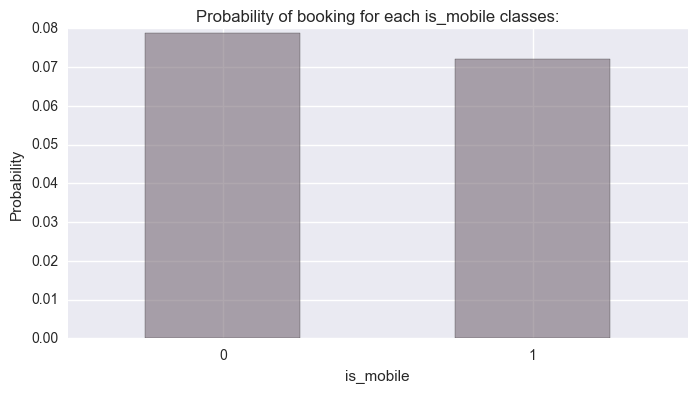

In [55]:
print(proba_clusters(cluster_0, 'is_mobile'))
plt.savefig("cluster_0_mobile.png")


Probability of booking for each is_package classes:
is_package
0    0.086310
1    0.037783
Name: is_booking, dtype: float64
None


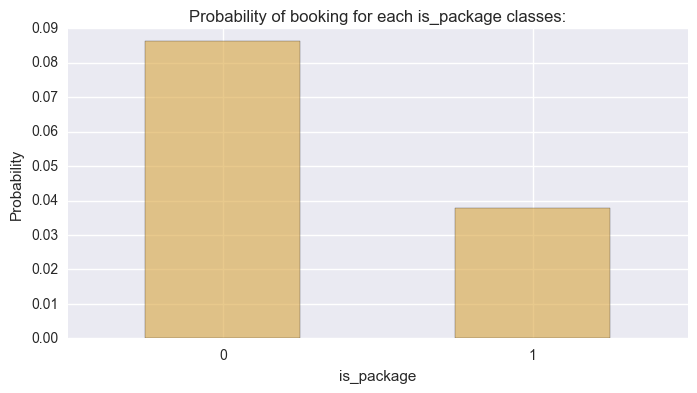

In [56]:
print(proba_clusters(cluster_0, 'is_package'))
plt.savefig("cluster_0_pack.png")


Probability of booking for each srch_adults_cnt classes:
srch_adults_cnt
1    0.046632
2    0.042857
3    0.092784
4    0.082221
5    0.052098
6    0.062574
7    0.092199
8    0.106667
9    0.153846
Name: is_booking, dtype: float64
None


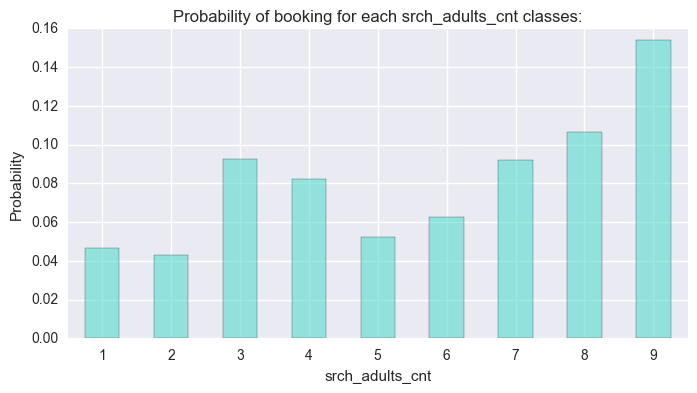

In [57]:
print(proba_clusters(cluster_0, 'srch_adults_cnt'))
plt.savefig("cluster_0_adults.png")


Probability of booking for each srch_children_cnt classes:
srch_children_cnt
0    0.082908
1    0.068565
2    0.057143
3    0.082090
4    0.064356
5    0.090909
6    0.041667
7    0.333333
8    0.000000
9    0.333333
Name: is_booking, dtype: float64
None


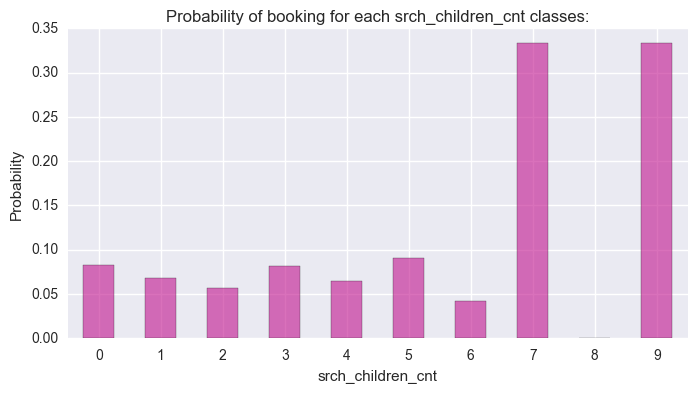

In [58]:
print(proba_clusters(cluster_0, 'srch_children_cnt'))
plt.savefig("cluster_0_child.png")


Probability of booking for each srch_rm_cnt classes:
srch_rm_cnt
1    0.031142
2    0.073529
3    0.095061
4    0.142373
5    0.076923
6    0.089552
7    0.033333
8    0.058824
Name: is_booking, dtype: float64
None


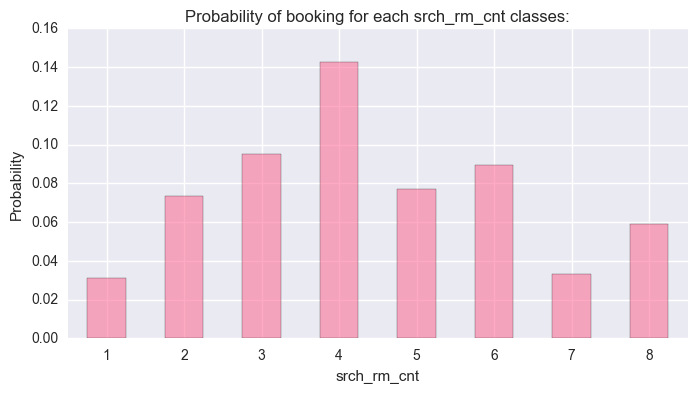

In [59]:
print(proba_clusters(cluster_0, 'srch_rm_cnt'))
plt.savefig("cluster_0_room.png")


Probability of booking for each channel classes:
channel
0    0.074684
1    0.053226
2    0.060680
3    0.076364
4    0.090909
5    0.084564
6    0.200000
7    0.000000
8    0.083333
9    0.083137
Name: is_booking, dtype: float64
None


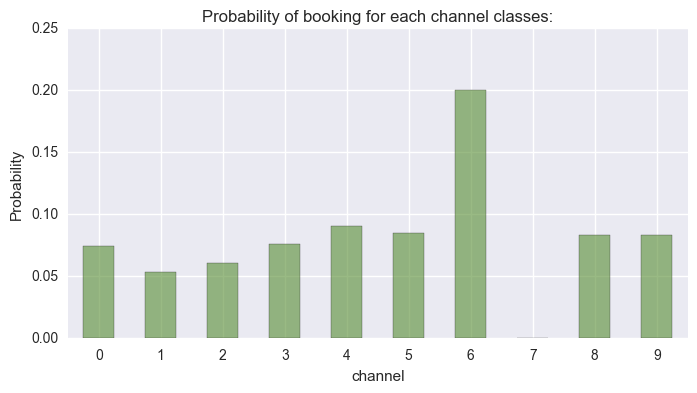

In [60]:
print(proba_clusters(cluster_0, 'channel'))
plt.savefig("cluster_0_channel.png")

In [61]:
print("Average days in advance booking: %.2f" %(cluster_0['days_in_advance'].mean()))

print("Average duration of stay: %.2f" %(cluster_0['duration'].mean()))

print("Average distance travelled: %.2f" %(cluster_0['orig_destination_distance'].mean()))

Average days in advance booking: 57.51
Average duration of stay: 3.00
Average distance travelled: 1801.98


In [62]:
#channel
channel_prob = pd.crosstab(cluster_0.channel, cluster_0.is_booking)
channel_prob.columns = ['No','Yes']
channel_prob['Total'] = channel_prob['No'] + channel_prob['Yes']
book_rate = cluster_0.pivot_table(values='is_booking',index='channel',aggfunc=lambda x: x.mean())
channel_prob['prob'] = book_rate
 
print(channel_prob.sort_values('Total', axis=0, ascending=False))

           No  Yes  Total      prob
channel                            
9        3507  318   3825  0.083137
0         731   59    790  0.074684
5         682   63    745  0.084564
1         587   33    620  0.053226
2         387   25    412  0.060680
3         254   21    275  0.076364
4         150   15    165  0.090909
7          37    0     37  0.000000
8          22    2     24  0.083333
6           8    2     10  0.200000


In [63]:
#distributions in the cluster
def dis_cluster(df, col):
    df['count'] = 1
    dff = df.groupby(col)['count'].sum()
    dff = pd.DataFrame(dff)
    dff['Percentage'] = dff.apply(lambda x: x/x.sum())
    print(dff)
    print("")
    
dis_cluster(cluster_0, 'is_mobile')
dis_cluster(cluster_0, 'is_package')
dis_cluster(cluster_0, 'srch_adults_cnt')
dis_cluster(cluster_0, 'srch_children_cnt')
dis_cluster(cluster_0, 'srch_rm_cnt')

           count  Percentage
is_mobile                   
0           6098    0.883384
1            805    0.116616

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy





            count  Percentage
is_package                   
0            5712    0.827466
1            1191    0.172534

                 count  Percentage
srch_adults_cnt                   
1                  193    0.027959
2                  210    0.030422
3                 1261    0.182674
4                 3296    0.477474
5                  691    0.100101
6                  847    0.122700
7                  141    0.020426
8                  225    0.032595
9                   39    0.005650

                   count  Percentage
srch_children_cnt                   
0                   4704    0.681443
1                    948    0.137332
2                    700    0.101405
3                    268    0.038824
4                    202    0.029263
5                     44    0.006374
6                     24    0.003477
7                      6    0.000869
8                      4    0.000579
9                      3    0.000435

             count  Percentage
srch_rm_cnt    

In [66]:
stats_comparison(cluster_0,'channel')

   channel  sub_average  rest_average     ttest    prob       significant
0        0     0.074684      0.078358 -0.362506  0.3585                 0
1        1     0.053226      0.080376 -2.405884  0.0081  Under-performing
2        2     0.060680      0.079033 -1.347527  0.0889  Under-performing
3        3     0.076364      0.078002 -0.099336  0.4604                 0
4        4     0.090909      0.077619  0.629142  0.7354                 0
5        5     0.084564      0.077135  0.714361  0.7625                 0
6        6     0.200000      0.077760  1.440940  0.9252    Out-performing
7        7     0.000000      0.078357 -1.773209  0.0381  Under-performing
8        8     0.083333      0.077918  0.098787  0.5393                 0
9        9     0.083137      0.071475  1.796643  0.9638    Out-performing


In [67]:
a = cluster_0.copy()
a['count'] = 1
b = a.groupby('channel')['count'].sum()
b = pd.DataFrame(b)
b['book_cnt'] = a.groupby('channel')['is_booking'].sum()
b

,count,book_cnt
channel,,
0,790,59
1,620,33
2,412,25
3,275,21
4,165,15
5,745,63
6,10,2
7,37,0
8,24,2


In [68]:
@pymc.stochastic(dtype=np.float64)
def hyperpriors(value=[1.0, 1.0]):
    a, b = value[0], value[1]
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

a = hyperpriors[0]
b = hyperpriors[1]

# This is what we don't know, but would like to find out
true_rates = pymc.Beta('true_rates', a, b, size=2)

# This is what we observed
trials = np.array([10, 3825])
successes = np.array([2, 318])
observed_values = pymc.Binomial('observed_values', trials, true_rates, observed=True, value=successes)

model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

# Generate 1M samples, and throw out the first 500k
mcmc.sample(1000000, 500000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 163.0 sec               0%                  ] 7031 of 1000000 complete in 1.0 sec

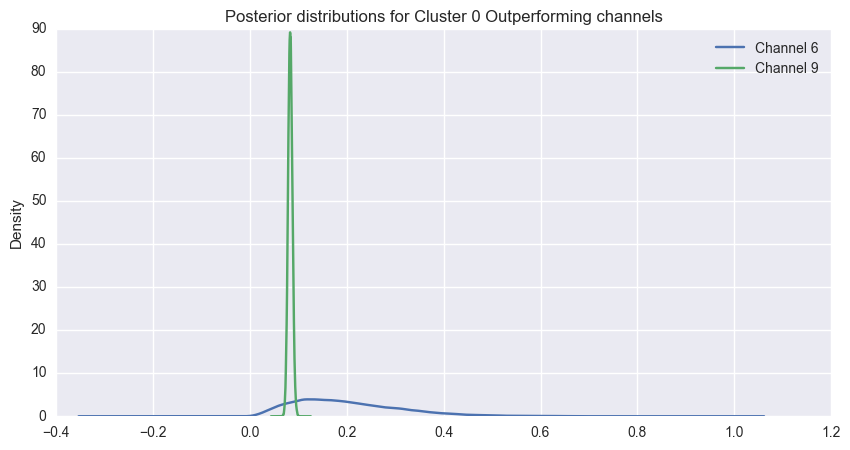

In [69]:
a = mcmc.trace('true_rates')[:][:,0]
a = pd.Series(a)
b = mcmc.trace('true_rates')[:][:,1]
b = pd.Series(b)

plt.figure(figsize=[10,5])
a.plot(kind='kde', label='Channel 6')
b.plot(kind='kde',label='Channel 9')

plt.legend()
plt.title("Posterior distributions for Cluster 0 Outperforming channels")
plt.show()
plt.savefig("cluster_0_density_ab.png")

In [70]:
diff_69 = mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,1]
print("Probability that Channel 6 gets > Channel 9: %0.3f" % (diff_69 < 0).mean())
print("Probability that Channel 6 gets < Channel 9: %0.3f" % (diff_69 > 0).mean())

Probability that Channel 6 gets > Channel 9: 0.134
Probability that Channel 6 gets < Channel 9: 0.866


### Cluster 1

In [71]:
cluster_1[num_list].describe()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,channel
count,34547.000000,34547.000000,34547.000000,34547.000000,34547.000000,34547.00000,34547.000000,34547.00000,34547.000000,34547.000000
mean,5.027701,89.151214,2454.727678,0.151070,0.630648,1.90853,0.330188,1.02032,0.026341,5.650274
std,2.033646,64.818620,1506.354938,0.358122,0.482636,0.57709,0.714550,0.14130,0.160149,3.782479
min,1.000000,0.000000,0.012800,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000
25%,3.000000,33.000000,1697.807350,0.000000,0.000000,2.00000,0.000000,1.00000,0.000000,1.000000
50%,5.000000,74.000000,1960.661721,0.000000,1.000000,2.00000,0.000000,1.00000,0.000000,9.000000
75%,7.000000,141.000000,2605.156750,0.000000,1.000000,2.00000,0.000000,1.00000,0.000000,9.000000
max,8.000000,200.000000,5786.247865,1.000000,1.000000,6.00000,6.000000,3.00000,1.000000,10.000000



Probability of booking for each is_mobile classes:
is_mobile
0    0.027448
1    0.020119
Name: is_booking, dtype: float64
None

Probability of booking for each is_package classes:
is_package
0    0.022179
1    0.028779
Name: is_booking, dtype: float64
None

Probability of booking for each srch_adults_cnt classes:
srch_adults_cnt
0    0.058140
1    0.032030
2    0.025166
3    0.024764
4    0.018131
5    0.000000
6    0.000000
Name: is_booking, dtype: float64
None

Probability of booking for each srch_children_cnt classes:
srch_children_cnt
0    0.026360
1    0.030593
2    0.022049
3    0.021739
4    0.013699
5    0.000000
6    0.000000
Name: is_booking, dtype: float64
None

Probability of booking for each srch_rm_cnt classes:
srch_rm_cnt
1    0.026236
2    0.031429
3    0.000000
Name: is_booking, dtype: float64
None

Probability of booking for each channel classes:
channel
0     0.021948
1     0.026063
2     0.021747
3     0.019925
4     0.060140
5     0.039709
6     0.010753
7     0.0

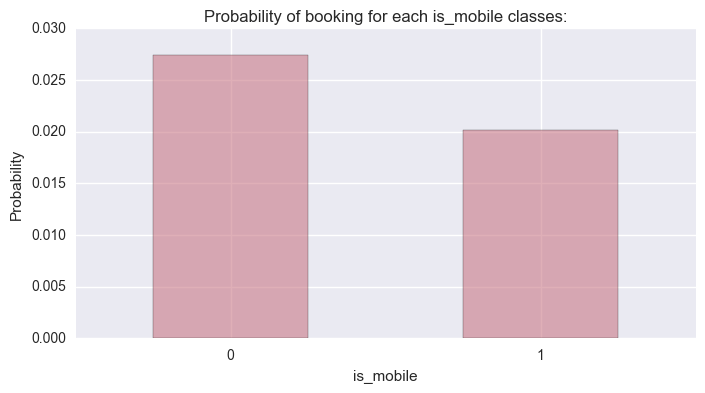

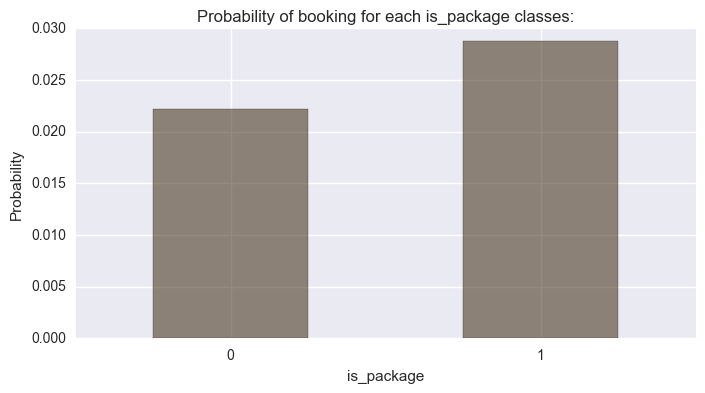

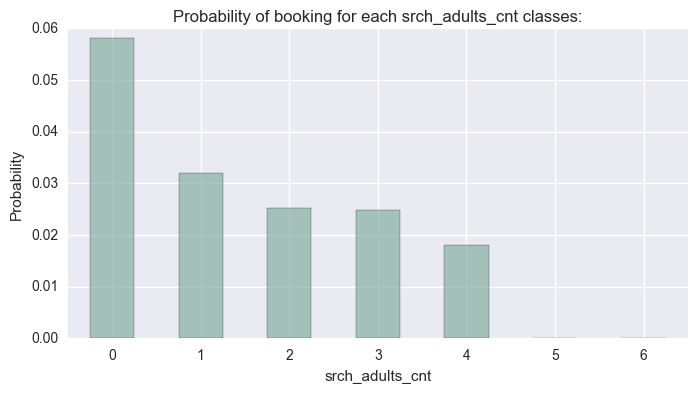

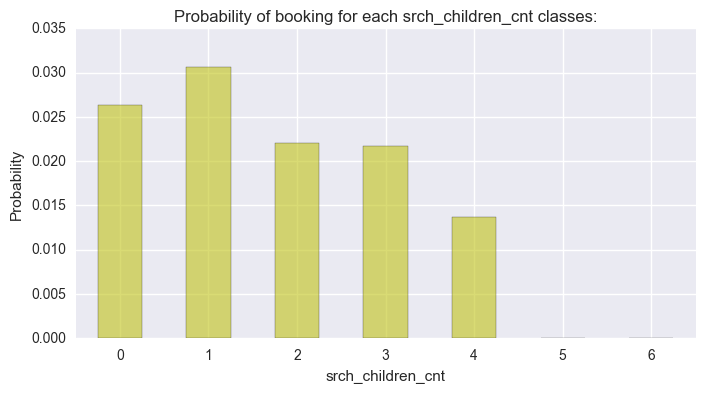

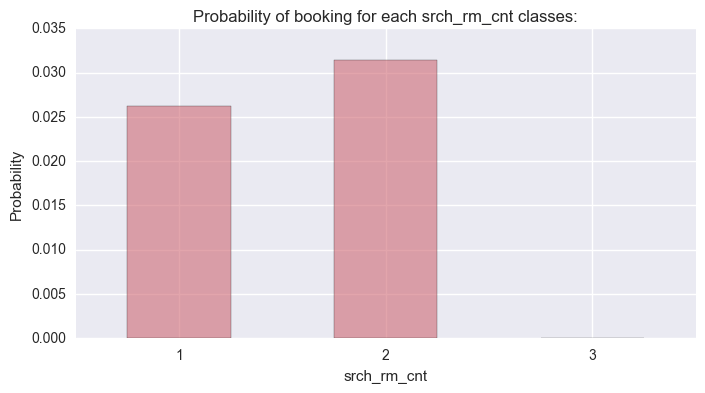

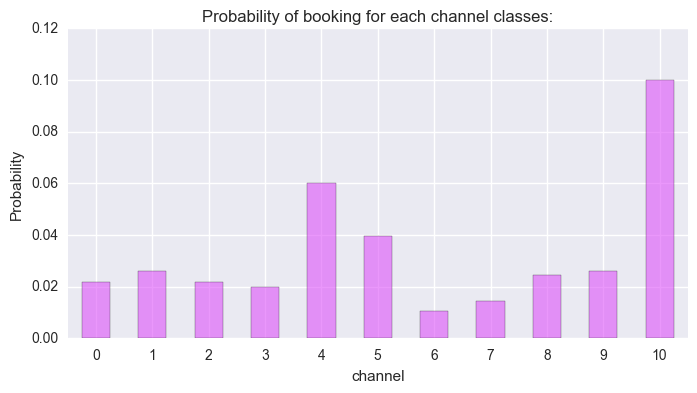

In [72]:
print(proba_clusters(cluster_1, 'is_mobile'))
print(proba_clusters(cluster_1, 'is_package'))
print(proba_clusters(cluster_1, 'srch_adults_cnt'))
print(proba_clusters(cluster_1, 'srch_children_cnt'))
print(proba_clusters(cluster_1, 'srch_rm_cnt'))
print(proba_clusters(cluster_1, 'channel'))

In [73]:
print("Average days in advance booking: %.2f" %(cluster_1['days_in_advance'].mean()))

print("Average duration of stay: %.2f" %(cluster_1['duration'].mean()))

print("Average distance travelled: %.2f" %(cluster_1['orig_destination_distance'].mean()))

Average days in advance booking: 89.15
Average duration of stay: 5.03
Average distance travelled: 2454.73


In [74]:
#channel
channel_prob = pd.crosstab(cluster_1.channel, cluster_1.is_booking)
channel_prob.columns = ['No','Yes']
channel_prob['Total'] = channel_prob['No'] + channel_prob['Yes']
book_rate = cluster_1.pivot_table(values='is_booking',index='channel',aggfunc=lambda x: x.mean())
channel_prob['prob'] = book_rate
 
print(channel_prob.sort_values('Total', axis=0, ascending=False))

            No  Yes  Total      prob
channel                             
9        17814  479  18293  0.026185
0         4679  105   4784  0.021948
1         3849  103   3952  0.026063
2         2609   58   2667  0.021747
5         1983   82   2065  0.039709
3         1574   32   1606  0.019925
4          672   43    715  0.060140
7          276    4    280  0.014286
6           92    1     93  0.010753
8           80    2     82  0.024390
10           9    1     10  0.100000


In [75]:
dis_cluster(cluster_1, 'is_mobile')
dis_cluster(cluster_1, 'is_package')
dis_cluster(cluster_1, 'srch_adults_cnt')
dis_cluster(cluster_1, 'srch_children_cnt')
dis_cluster(cluster_1, 'srch_rm_cnt')

           count  Percentage
is_mobile                   
0          29328     0.84893
1           5219     0.15107


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




            count  Percentage
is_package                   
0           12760    0.369352
1           21787    0.630648

                 count  Percentage
srch_adults_cnt                   
0                  172    0.004979
1                 6088    0.176224
2                25829    0.747648
3                 1696    0.049093
4                  717    0.020754
5                   38    0.001100
6                    7    0.000203

                   count  Percentage
srch_children_cnt                   
0                  27352    0.791733
1                   3661    0.105972
2                   2948    0.085333
3                    506    0.014647
4                     73    0.002113
5                      2    0.000058
6                      5    0.000145

             count  Percentage
srch_rm_cnt                   
1            33846    0.979709
2              700    0.020262
3                1    0.000029



In [78]:
stats_comparison(cluster_1,'channel')

    channel  sub_average  rest_average     ttest    prob       significant
0         0     0.021948      0.027047 -2.044003  0.0205  Under-performing
1         1     0.026063      0.026377 -0.116034  0.4538                 0
2         2     0.021747      0.026725 -1.542041  0.0615  Under-performing
3         3     0.019925      0.026654 -1.644111  0.0501  Under-performing
4         4     0.060140      0.025627  5.702672  1.0000    Out-performing
5         5     0.039709      0.025491  3.912083  1.0000    Out-performing
6         6     0.010753      0.026383 -0.939950  0.1736                 0
7         7     0.014286      0.026439 -1.264742  0.1030                 0
8         8     0.024390      0.026346 -0.110431  0.4560                 0
9         9     0.026185      0.026517 -0.192134  0.4238                 0
10       10     0.100000      0.026320  1.454689  0.9271    Out-performing


In [79]:
aa = cluster_1.copy()
aa['count'] = 1
bb = aa.groupby('channel')['count'].sum()
bb = pd.DataFrame(bb)
bb['book_cnt'] = aa.groupby('channel')['is_booking'].sum()
bb

,count,book_cnt
channel,,
0,4784,105
1,3952,103
2,2667,58
3,1606,32
4,715,43
5,2065,82
6,93,1
7,280,4
8,82,2


In [80]:
@pymc.stochastic(dtype=np.float64)
def hyperpriors(value=[1.0, 1.0]):
    a, b = value[0], value[1]
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

a = hyperpriors[0]
b = hyperpriors[1]

# This is what we don't know, but would like to find out
true_rates = pymc.Beta('true_rates', a, b, size=3)

# This is what we observed
trials = np.array([715, 2065,10])
successes = np.array([43, 82,1])
observed_values = pymc.Binomial('observed_values', trials, true_rates, observed=True, value=successes)

model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

# Generate 1M samples, and throw out the first 500k
mcmc.sample(1000000, 500000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 174.8 sec               0%                  ] 6789 of 1000000 complete in 1.0 sec

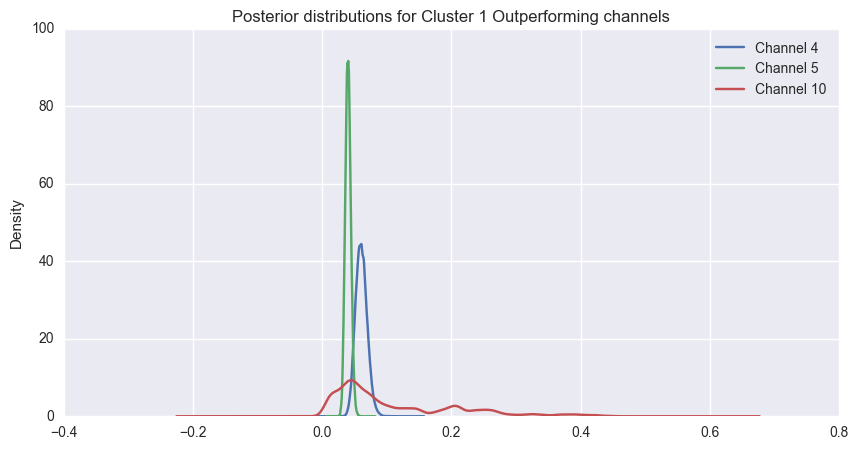

In [81]:
a = mcmc.trace('true_rates')[:][:,0]
a = pd.Series(a)
b = mcmc.trace('true_rates')[:][:,1]
b = pd.Series(b)
c = mcmc.trace('true_rates')[:][:,2]
c = pd.Series(c)

plt.figure(figsize=[10,5])
a.plot(kind='kde', label='Channel 4')
b.plot(kind='kde',label='Channel 5')
c.plot(kind='kde',label='Channel 10')
plt.legend()
plt.title("Posterior distributions for Cluster 1 Outperforming channels")
plt.show()
plt.savefig("cluster_1_density_ab.png")

In [82]:
diff_45 = mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,1]
print("Probability that Channel 4 gets > Channel 5: %0.3f" % (diff_69 < 0).mean())
print("Probability that Channel 5 gets < Channel 5: %0.3f" % (diff_69 > 0).mean())

diff_510 = mcmc.trace('true_rates')[:][:,1] - mcmc.trace('true_rates')[:][:,2]
print("Probability that Channel 5 gets > Channel 10: %0.3f" % (diff_510 < 0).mean())
print("Probability that Channel 5 gets < Channel 10: %0.3f" % (diff_510 > 0).mean())

diff_410 = mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,2]
print("Probability that Channel 4 gets > Channel 10: %0.3f" % (diff_410 < 0).mean())
print("Probability that Channel 4 gets < Channel 10: %0.3f" % (diff_410 > 0).mean())

Probability that Channel 4 gets > Channel 5: 0.134
Probability that Channel 5 gets < Channel 5: 0.866
Probability that Channel 5 gets > Channel 10: 0.750
Probability that Channel 5 gets < Channel 10: 0.250
Probability that Channel 4 gets > Channel 10: 0.572
Probability that Channel 4 gets < Channel 10: 0.428


### Cluster 2

In [83]:
cluster_2[num_list].describe()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,channel
count,58021.000000,58021.000000,58021.000000,58021.000000,58021.000000,58021.000000,58021.000000,58021.000000,58021.000000,58021.000000
mean,2.121801,29.624050,1524.909464,0.125024,0.024646,1.823150,0.303666,1.016890,0.112770,5.969201
std,1.257588,34.990277,1353.412746,0.330749,0.155046,0.600705,0.668423,0.128996,0.316314,3.693702
min,1.000000,0.000000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,320.291300,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
50%,2.000000,17.000000,1952.581500,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,9.000000
75%,3.000000,41.000000,1960.661721,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,9.000000
max,8.000000,200.000000,5786.247865,1.000000,1.000000,5.000000,6.000000,2.000000,1.000000,10.000000



Probability of booking for each is_mobile classes:
is_mobile
0    0.116257
1    0.088365
Name: is_booking, dtype: float64
None

Probability of booking for each is_package classes:
is_package
0    0.109275
1    0.251049
Name: is_booking, dtype: float64
None

Probability of booking for each srch_adults_cnt classes:
srch_adults_cnt
0    0.375000
1    0.159598
2    0.097771
3    0.081381
4    0.072568
5    0.000000
Name: is_booking, dtype: float64
None

Probability of booking for each srch_children_cnt classes:
srch_children_cnt
0    0.116065
1    0.116040
2    0.078763
3    0.072056
4    0.112360
5    0.000000
6    0.142857
Name: is_booking, dtype: float64
None

Probability of booking for each srch_rm_cnt classes:
srch_rm_cnt
0    1.000000
1    0.111327
2    0.195719
Name: is_booking, dtype: float64
None

Probability of booking for each channel classes:
channel
0     0.107812
1     0.102696
2     0.082821
3     0.085098
4     0.158499
5     0.130931
6     0.135593
7     0.063786
8     0.

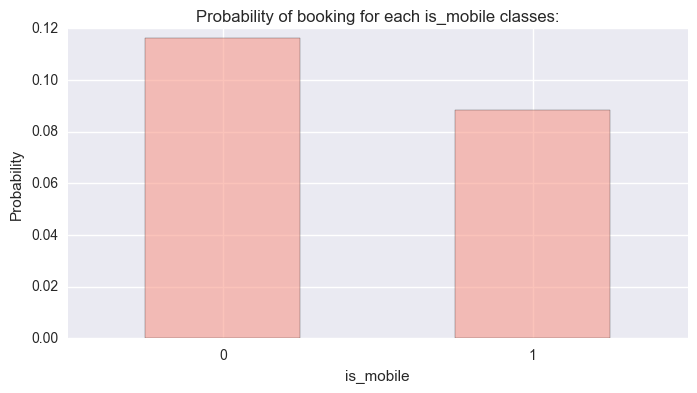

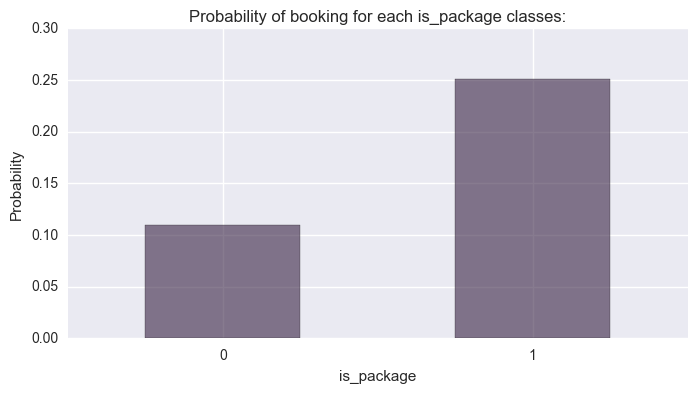

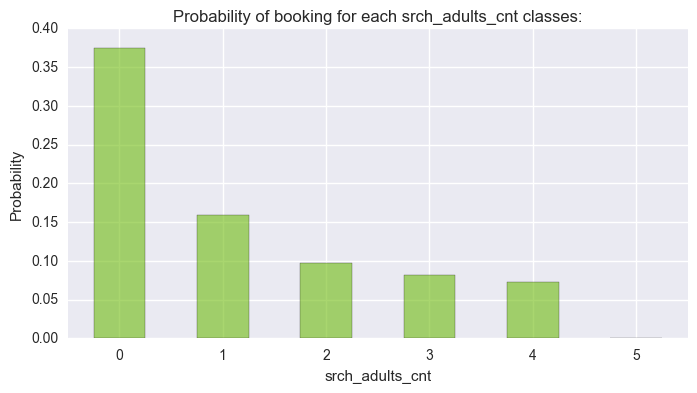

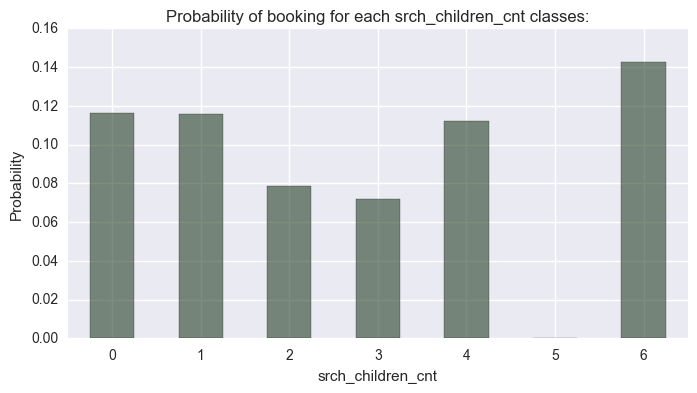

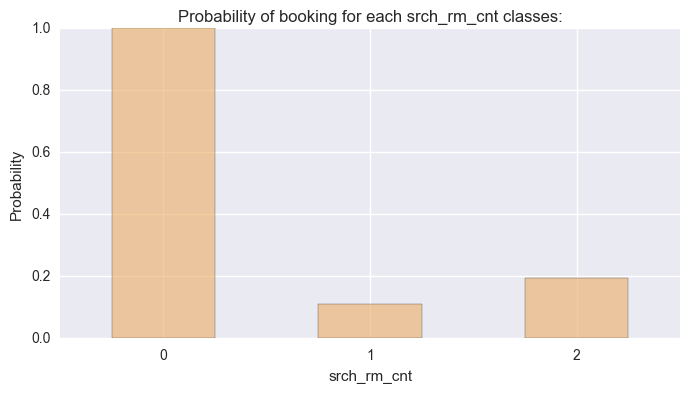

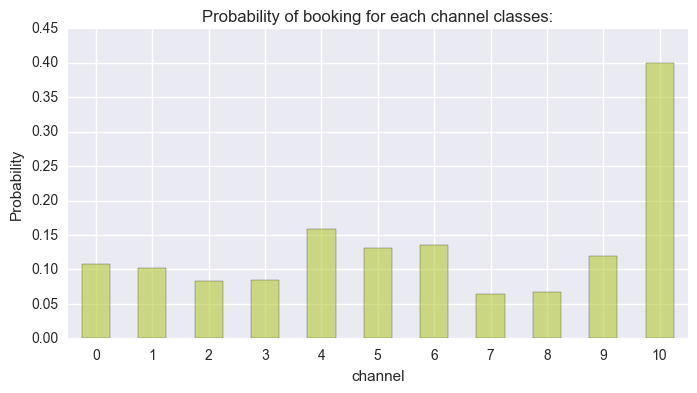

In [84]:
print(proba_clusters(cluster_2, 'is_mobile'))
print(proba_clusters(cluster_2, 'is_package'))
print(proba_clusters(cluster_2, 'srch_adults_cnt'))
print(proba_clusters(cluster_2, 'srch_children_cnt'))
print(proba_clusters(cluster_2, 'srch_rm_cnt'))
print(proba_clusters(cluster_2, 'channel'))

In [85]:
print("Average days in advance booking: %.2f" %(cluster_2['days_in_advance'].mean()))

print("Average duration of stay: %.2f" %(cluster_2['duration'].mean()))

print("Average distance travelled: %.2f" %(cluster_2['orig_destination_distance'].mean()))

Average days in advance booking: 29.62
Average duration of stay: 2.12
Average distance travelled: 1524.91


In [86]:
#channel
channel_prob = pd.crosstab(cluster_2.channel, cluster_2.is_booking)
channel_prob.columns = ['No','Yes']
channel_prob['Total'] = channel_prob['No'] + channel_prob['Yes']
book_rate = cluster_2.pivot_table(values='is_booking',index='channel',aggfunc=lambda x: x.mean())
channel_prob['prob'] = book_rate
 
print(channel_prob.sort_values('Total', axis=0, ascending=False))

            No   Yes  Total      prob
channel                              
9        29046  3928  32974  0.119124
0         6099   737   6836  0.107812
1         5059   579   5638  0.102696
2         4330   391   4721  0.082821
5         2894   436   3330  0.130931
3         2290   213   2503  0.085098
4         1099   207   1306  0.158499
7          455    31    486  0.063786
8          152    11    163  0.067485
6           51     8     59  0.135593
10           3     2      5  0.400000


In [87]:
dis_cluster(cluster_2, 'is_mobile')
dis_cluster(cluster_2, 'is_package')
dis_cluster(cluster_2, 'srch_adults_cnt')
dis_cluster(cluster_2, 'srch_children_cnt')
dis_cluster(cluster_2, 'srch_rm_cnt')

           count  Percentage
is_mobile                   
0          50767    0.874976
1           7254    0.125024


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




            count  Percentage
is_package                   
0           56591    0.975354
1            1430    0.024646

                 count  Percentage
srch_adults_cnt                   
0                    8    0.000138
1                15207    0.262095
2                39112    0.674101
3                 2433    0.041933
4                 1254    0.021613
5                    7    0.000121

                   count  Percentage
srch_children_cnt                   
0                  46293    0.797866
1                   6627    0.114217
2                   4431    0.076369
3                    569    0.009807
4                     89    0.001534
5                      5    0.000086
6                      7    0.000121

             count  Percentage
srch_rm_cnt                   
0                1    0.000017
1            57039    0.983075
2              981    0.016908



In [90]:
stats_comparison(cluster_2,'channel')

    channel  sub_average  rest_average     ttest    prob       significant
0         0     0.107812      0.113432 -1.379776  0.0838  Under-performing
1         1     0.102696      0.113854 -2.516676  0.0059  Under-performing
2         2     0.082821      0.115422 -6.787360  0.0000  Under-performing
3         3     0.085098      0.114017 -4.474318  0.0000  Under-performing
4         4     0.158499      0.111716  5.284449  1.0000    Out-performing
5         5     0.130931      0.111664  3.412655  0.9997    Out-performing
6         6     0.135593      0.112746  0.554522  0.7104                 0
7         7     0.063786      0.113183 -3.428313  0.0003  Under-performing
8         8     0.067485      0.112897 -1.830390  0.0336  Under-performing
9         9     0.119124      0.104404  5.552361  1.0000    Out-performing
10       10     0.400000      0.112745  2.030580  0.9789    Out-performing


In [91]:
aaa = cluster_2.copy()
aaa['count'] = 1
bbb = aaa.groupby('channel')['count'].sum()
bbb = pd.DataFrame(bbb)
bbb['book_cnt'] = aaa.groupby('channel')['is_booking'].sum()
bbb

,count,book_cnt
channel,,
0,6836,737
1,5638,579
2,4721,391
3,2503,213
4,1306,207
5,3330,436
6,59,8
7,486,31
8,163,11


In [92]:
@pymc.stochastic(dtype=np.float64)
def hyperpriors(value=[1.0, 1.0]):
    a, b = value[0], value[1]
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

a = hyperpriors[0]
b = hyperpriors[1]

# This is what we don't know, but would like to find out
true_rates = pymc.Beta('true_rates', a, b, size=4)

# This is what we observed
trials = np.array([1306, 3330,32974,5])
successes = np.array([207, 436,3928,2])
observed_values = pymc.Binomial('observed_values', trials, true_rates, observed=True, value=successes)

model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

# Generate 1M samples, and throw out the first 500k
mcmc.sample(1000000, 500000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 175.5 sec               0%                  ] 6697 of 1000000 complete in 1.0 sec

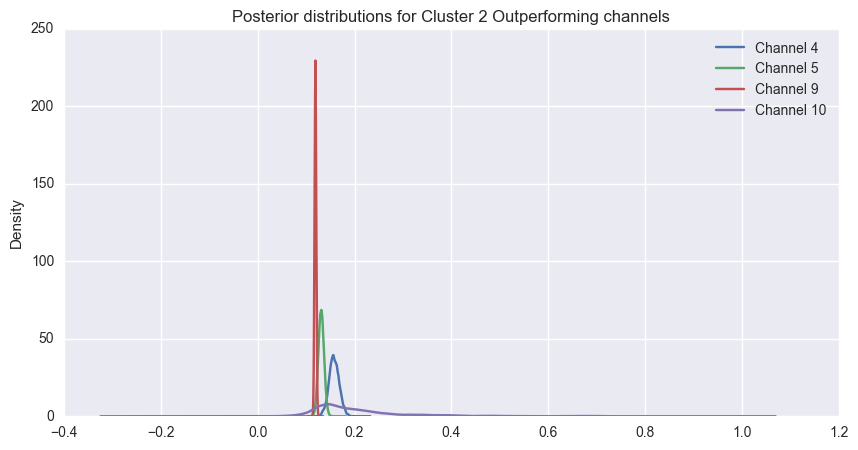

In [93]:
a = mcmc.trace('true_rates')[:][:,0]
a = pd.Series(a)
b = mcmc.trace('true_rates')[:][:,1]
b = pd.Series(b)
c = mcmc.trace('true_rates')[:][:,2]
c = pd.Series(c)
d = mcmc.trace('true_rates')[:][:,3]
d = pd.Series(d)

plt.figure(figsize=[10,5])
a.plot(kind='kde', label='Channel 4')
b.plot(kind='kde',label='Channel 5')
c.plot(kind='kde',label='Channel 9')
d.plot(kind='kde',label='Channel 10')
plt.legend()
plt.title("Posterior distributions for Cluster 2 Outperforming channels")
plt.show()
plt.savefig("cluster_2_density_ab.png")

In [94]:
diff_45 = mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,1]
print("Probability that Channel 4 gets > Channel 5: %0.3f" % (diff_45 < 0).mean())
print("Probability that Channel 4 gets < Channel 5: %0.3f" % (diff_45 > 0).mean())

diff_910 = mcmc.trace('true_rates')[:][:,2] - mcmc.trace('true_rates')[:][:,3]
print("Probability that Channel 9 gets > Channel 10: %0.3f" % (diff_910 < 0).mean())
print("Probability that Channel 9 gets < Channel 10: %0.3f" % (diff_910 > 0).mean())

diff_410 = mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,3]
print("Probability that Channel 4 gets > Channel 10: %0.3f" % (diff_410 < 0).mean())
print("Probability that Channel 4 gets < Channel 10: %0.3f" % (diff_410 > 0).mean())

diff_59 = mcmc.trace('true_rates')[:][:,1] - mcmc.trace('true_rates')[:][:,2]
print("Probability that Channel 5 gets > Channel 9: %0.3f" % (diff_59 < 0).mean())
print("Probability that Channel 5 gets < Channel 9: %0.3f" % (diff_59 > 0).mean())

Probability that Channel 4 gets > Channel 5: 0.011
Probability that Channel 4 gets < Channel 5: 0.989
Probability that Channel 9 gets > Channel 10: 0.892
Probability that Channel 9 gets < Channel 10: 0.108
Probability that Channel 4 gets > Channel 10: 0.615
Probability that Channel 4 gets < Channel 10: 0.385
Probability that Channel 5 gets > Channel 9: 0.022
Probability that Channel 5 gets < Channel 9: 0.978



### 4.3 Feature Importances

### Cluster 0

In [95]:
cluster_0_new = cluster_0.copy()
dummy_channels = pd.get_dummies(cluster_0_new['channel'], prefix='channel')
cluster_0_new = cluster_0_new.join(dummy_channels.ix[:, :])

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=0)
features = ['duration','days_in_advance','orig_destination_distance','is_mobile','is_package','srch_adults_cnt',
            'srch_children_cnt','srch_rm_cnt','channel_0','channel_1','channel_2','channel_3','channel_4','channel_5','channel_6','channel_7','channel_8',
            'channel_9']
target = ['is_booking']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in cluster_0_new[features]:
    cluster_0_new[i] = sc.fit_transform(cluster_0_new[i])
    
rf.fit(cluster_0_new[features], cluster_0_new[target])

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

C:\Users\DHRUBAJIT\Anaconda3\lib\site

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

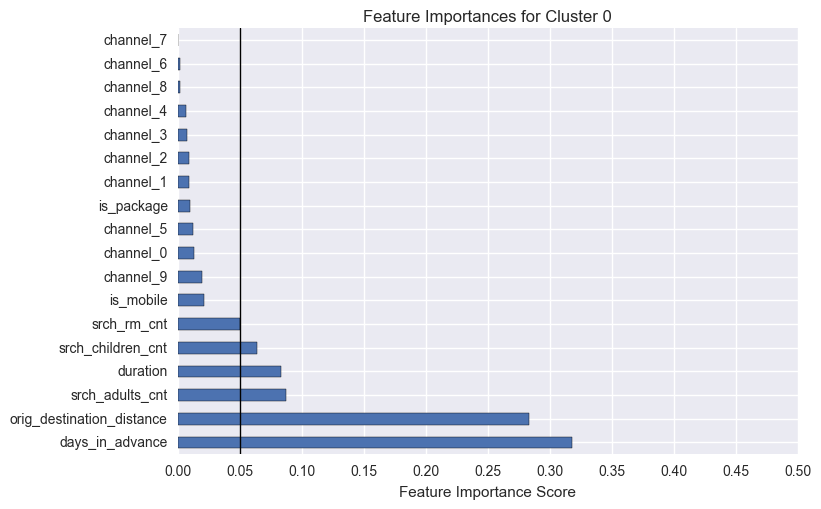

In [97]:
feature_names = cluster_0_new[features].columns
feat_imp = pd.Series(rf.feature_importances_, feature_names)
feat_imp = feat_imp.sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances for Cluster 0', rot=0)
plt.xlabel('Feature Importance Score')
plt.xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.axvline(x=0.05, ymin=0.0, ymax = 1.0, linewidth=1, color='black')
plt.savefig("feat_imp_cluster0.png")

In [98]:
# create logistic estimator
feat = ['duration','days_in_advance','orig_destination_distance','is_mobile','is_package','srch_adults_cnt',
            'srch_children_cnt','srch_rm_cnt']
logit = sm.Logit(cluster_0['is_booking'], cluster_0[feat], missing='drop')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.272705
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_booking   No. Observations:                 6903
Model:                          Logit   Df Residuals:                     6895
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Sep 2017   Pseudo R-squ.:                0.003642
Time:                        12:57:57   Log-Likelihood:                -1882.5
converged:                       True   LL-Null:                       -1889.4
                                        LLR p-value:                   0.05560
=============================================================================================
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
duration                     -0.2840      0.032     -8.877      0.000        -0.347    -0.221
days_in_advance              -0.0025      0.001     -2.660      0.008        -0.004    -0.001
orig_destination_distance -6.599e-05    3.2e-05     -2.062      0.039        -0.000 -3.26e-06
is_mobile                    -0.1783      0.146     -1.223      0.221        -0.464     0.107
is_package                   -0.5157      0.167     -3.087      0.002        -0.843    -0.188
srch_adults_cnt              -0.2118      0.024     -8.651      0.000        -0.260    -0.164
srch_children_cnt            -0.1538      0.041     -3.727      0.000        -0.235    -0.073
srch_rm_cnt                  -0.1648      0.038     -4.306      0.000        -0.240    -0.090
=============================================================================================
"""

In [99]:
# convert logit to odds ratio
np.exp(result.params)
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Higher CI', 'OR']
a = np.exp(conf)
coefs = [-0.2840,-0.0025,-6.599e-05,-0.1783,-0.5157,-0.2118,-0.1538,-0.1648]
a['Coef'] = coefs
print(a[['Coef','Lower CI','Higher CI','OR']])

                               Coef  Lower CI  Higher CI        OR
duration                  -0.284000  0.707017   0.801486  0.752771
days_in_advance           -0.002500  0.995593   0.999331  0.997460
orig_destination_distance -0.000066  0.999871   0.999997  0.999934
is_mobile                 -0.178300  0.628850   1.113325  0.836728
is_package                -0.515700  0.430350   0.828424  0.597086
srch_adults_cnt           -0.211800  0.771243   0.848916  0.809148
srch_children_cnt         -0.153800  0.790817   0.929683  0.857443
srch_rm_cnt               -0.164800  0.786788   0.914129  0.848072


### Cluster 1

In [100]:
cluster_1_new = cluster_1.copy()
dummy_channels1 = pd.get_dummies(cluster_1_new['channel'], prefix='channel')
cluster_1_new = cluster_1_new.join(dummy_channels1.ix[:, :])

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=500, random_state=0)
features1 = ['duration','days_in_advance','orig_destination_distance','is_mobile','is_package','srch_adults_cnt',
            'srch_children_cnt','srch_rm_cnt','channel_0','channel_1','channel_2','channel_3','channel_4','channel_5','channel_6','channel_7','channel_8',
            'channel_9','channel_10']
target1 = ['is_booking']

from sklearn import preprocessing 
sc = preprocessing.StandardScaler()
for i in cluster_1_new[features]:
    cluster_1_new[i] = sc.fit_transform(cluster_1_new[i])

rf1.fit(cluster_1_new[features1], cluster_1_new[target1])

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

C:\Users\DHRUBAJIT\Anaconda3\lib\site

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

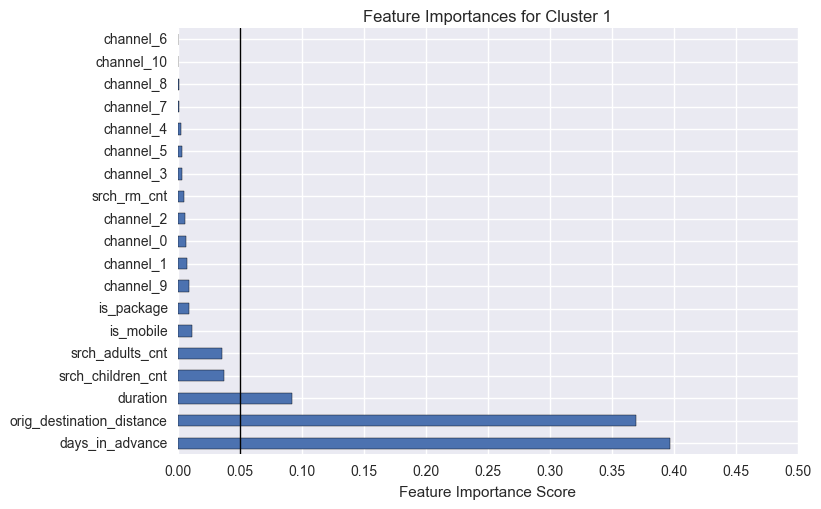

In [102]:
feature_names1 = cluster_1_new[features1].columns
feat_imp1 = pd.Series(rf1.feature_importances_, feature_names1)
feat_imp1 = feat_imp1.sort_values(ascending=False)
feat_imp1.plot(kind='barh', title='Feature Importances for Cluster 1', rot=0)
plt.xlabel('Feature Importance Score')
plt.xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.axvline(x=0.05, ymin=0.0, ymax = 1.0, linewidth=1, color='black')
plt.savefig("feat_imp_cluster1.png")

In [103]:
# create logistic estimator
feat1 = ['duration','days_in_advance','orig_destination_distance','is_mobile','is_package','srch_adults_cnt',
            'srch_children_cnt','srch_rm_cnt']
logit1 = sm.Logit(cluster_1['is_booking'], cluster_1[feat1], missing='drop')
result1 = logit1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.122768
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_booking   No. Observations:                34547
Model:                          Logit   Df Residuals:                    34539
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Sep 2017   Pseudo R-squ.:               -0.008091
Time:                        12:58:19   Log-Likelihood:                -4241.3
converged:                       True   LL-Null:                       -4207.2
                                        LLR p-value:                     1.000
=============================================================================================
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
duration                      0.0025      0.017      0.153      0.878        -0.030     0.035
days_in_advance            2.207e-05      0.001      0.041      0.967        -0.001     0.001
orig_destination_distance  1.369e-05   2.35e-05      0.583      0.560     -3.23e-05  5.97e-05
is_mobile                    -0.3422      0.105     -3.258      0.001        -0.548    -0.136
is_package                    0.2161      0.078      2.777      0.005         0.064     0.369
srch_adults_cnt              -0.3242      0.060     -5.367      0.000        -0.443    -0.206
srch_children_cnt            -0.0001      0.050     -0.002      0.998        -0.098     0.097
srch_rm_cnt                  -3.1097      0.177    -17.575      0.000        -3.457    -2.763
=============================================================================================
"""

In [104]:
# convert logit to odds ratio
np.exp(result1.params)
params1 = result1.params
conf1 = result1.conf_int()
conf1['OR'] = params1
conf1.columns = ['Lower CI', 'Higher CI', 'OR']
b = np.exp(conf1)
coefs = [0.0025,2.207e-05,1.369e-05,-0.3422,0.2161,-0.3242,-0.0001,-3.1097]
b['Coef'] = coefs
print(b[['Coef','Lower CI','Higher CI','OR']])

                               Coef  Lower CI  Higher CI        OR
duration                   0.002500  0.970596   1.035520  1.002533
days_in_advance            0.000022  0.998965   1.001080  1.000022
orig_destination_distance  0.000014  0.999968   1.000060  1.000014
is_mobile                 -0.342200  0.578018   0.872555  0.710178
is_package                 0.216100  1.065610   1.445682  1.241182
srch_adults_cnt           -0.324200  0.642361   0.813999  0.723105
srch_children_cnt         -0.000100  0.907062   1.102232  0.999896
srch_rm_cnt               -3.109700  0.031539   0.063107  0.044613


### Cluster 2

In [105]:
cluster_2_new = cluster_2.copy()
dummy_channels2 = pd.get_dummies(cluster_2_new['channel'], prefix='channel')
cluster_2_new = cluster_2_new.join(dummy_channels2.ix[:, :])

In [106]:
rf2 = RandomForestClassifier(n_estimators=500, random_state=0)
features2 = ['duration','days_in_advance','orig_destination_distance','is_mobile','is_package','srch_adults_cnt',
            'srch_children_cnt','srch_rm_cnt','channel_0','channel_1','channel_2','channel_3','channel_4','channel_5','channel_6','channel_7','channel_8',
            'channel_9','channel_10']
target2 = ['is_booking']

rf2.fit(cluster_2_new[features1], cluster_2_new[target1])

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

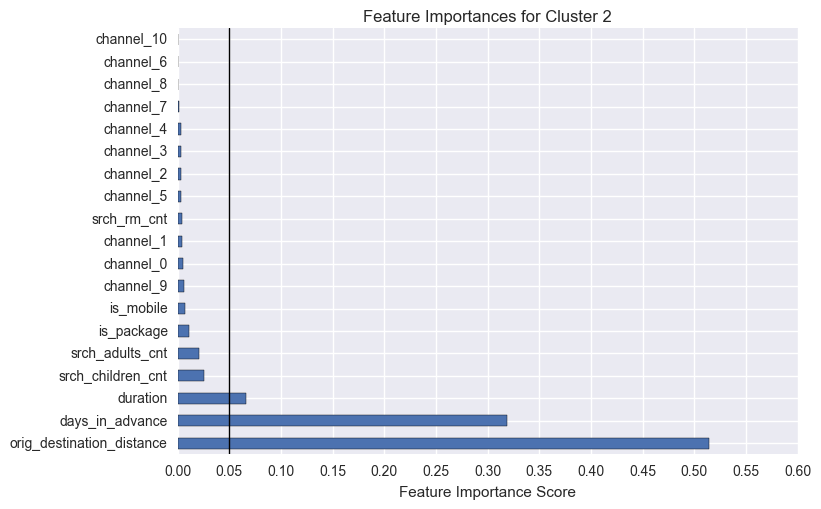

In [107]:
feature_names2 = cluster_2_new[features2].columns
feat_imp2 = pd.Series(rf2.feature_importances_, feature_names2)
feat_imp2 = feat_imp2.sort_values(ascending=False)
feat_imp2.plot(kind='barh', title='Feature Importances for Cluster 2', rot=0)
plt.xlabel('Feature Importance Score')
plt.xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60])
plt.axvline(x=0.05, ymin=0.0, ymax = 1.0, linewidth=1, color='black')
plt.savefig("feat_imp_cluster2.png")

In [108]:
# create logistic estimator
feat2 = ['duration','days_in_advance','orig_destination_distance','is_mobile','is_package','srch_adults_cnt',
            'srch_children_cnt','srch_rm_cnt']
logit2 = sm.Logit(cluster_2['is_booking'], cluster_2[feat1], missing='drop')
result2 = logit2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.347924
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_booking   No. Observations:                58021
Model:                          Logit   Df Residuals:                    58013
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Sep 2017   Pseudo R-squ.:                 0.01233
Time:                        12:59:09   Log-Likelihood:                -20187.
converged:                       True   LL-Null:                       -20439.
                                        LLR p-value:                1.154e-104
=============================================================================================
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
duration                     -0.1316      0.011    -11.727      0.000        -0.154    -0.110
days_in_advance              -0.0020      0.000     -4.860      0.000        -0.003    -0.001
orig_destination_distance  2.948e-05   9.61e-06      3.067      0.002      1.06e-05  4.83e-05
is_mobile                    -0.2929      0.044     -6.650      0.000        -0.379    -0.207
is_package                    0.7469      0.064     11.712      0.000         0.622     0.872
srch_adults_cnt              -0.5145      0.023    -21.995      0.000        -0.560    -0.469
srch_children_cnt            -0.0798      0.022     -3.653      0.000        -0.123    -0.037
srch_rm_cnt                  -0.8223      0.047    -17.319      0.000        -0.915    -0.729
=============================================================================================
"""

In [109]:
# convert logit to odds ratio
np.exp(result2.params)
params2 = result2.params
conf2 = result2.conf_int()
conf2['OR'] = params2
conf2.columns = ['Lower CI', 'Higher CI', 'OR']
c = np.exp(conf2)
coefs = [-0.1316,-0.0020,2.948e-05,-0.29290,0.7469,-0.5145,-0.0798,-0.8223]
c['Coef'] = coefs
print(c[['Coef','Lower CI','Higher CI','OR']])

                               Coef  Lower CI  Higher CI        OR
duration                  -0.131600  0.857645   0.896207  0.876714
days_in_advance           -0.002000  0.997221   0.998817  0.998019
orig_destination_distance  0.000029  1.000011   1.000048  1.000029
is_mobile                 -0.292900  0.684346   0.813340  0.746061
is_package                 0.746900  1.862424   2.391347  2.110379
srch_adults_cnt           -0.514500  0.571025   0.625856  0.597812
srch_children_cnt         -0.079800  0.884631   0.963705  0.923322
srch_rm_cnt               -0.822300  0.400354   0.482256  0.439401


## Section 5

### Cluster 0

In [110]:
num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

In [111]:
## build the decision tree model
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn import tree

# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('treeeee.png')
    return(graph)

0.922062871215


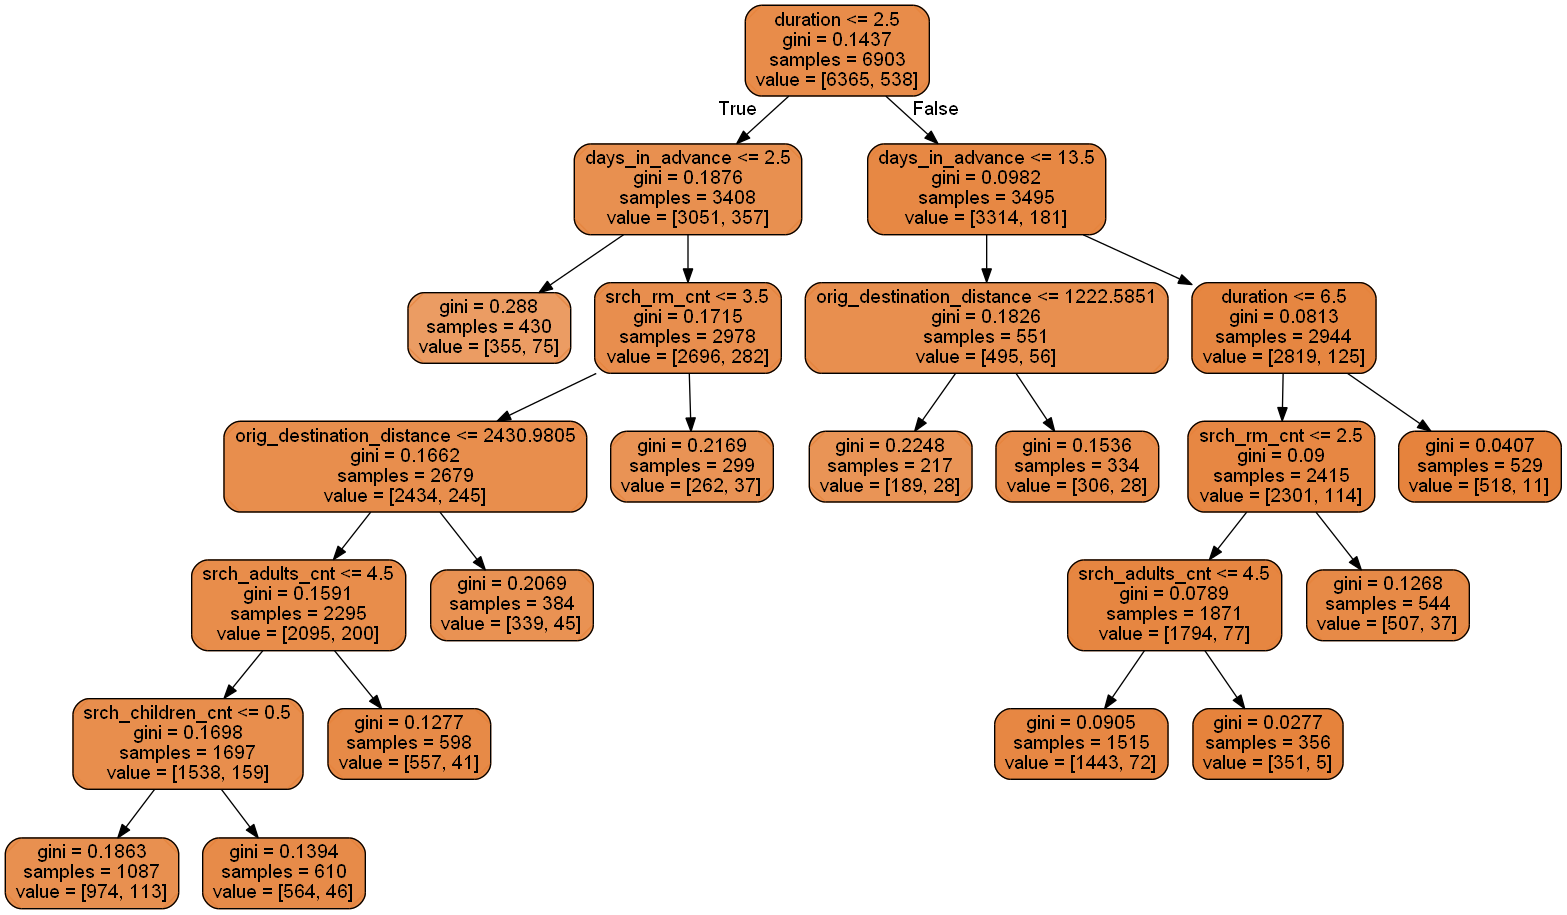

In [112]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=12, min_samples_leaf=200)
clf = clf.fit(cluster_0[num_list], cluster_0['is_booking'])
print(clf.score(cluster_0[num_list], cluster_0['is_booking']))


feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile','is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
graph1 = print_tree(clf, features = features)
Image(graph1.create_png())


### cluster 1

0.973659073147


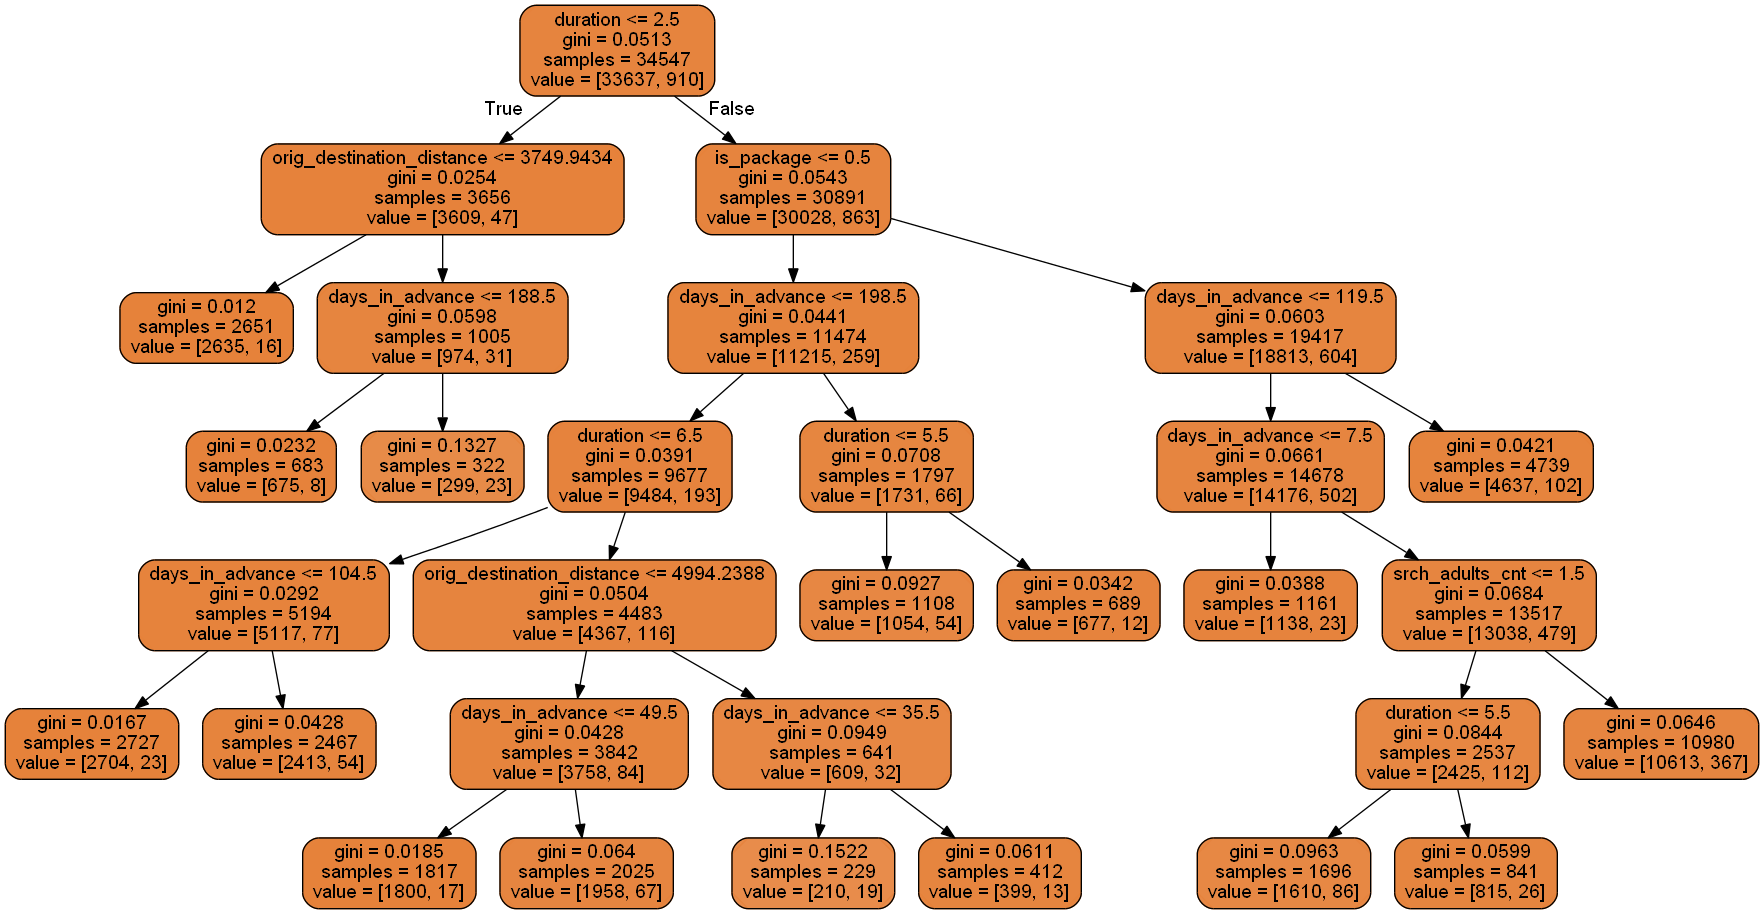

In [113]:
clf1 = tree.DecisionTreeClassifier(max_leaf_nodes=16, min_samples_leaf=200)
clf1 = clf1.fit(cluster_1[num_list], cluster_1['is_booking'])
print(clf1.score(cluster_1[num_list], cluster_1['is_booking']))


feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile','is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
graph1 = print_tree(clf1, features = features)
Image(graph1.create_png())

### cluster 2

0.887230485514


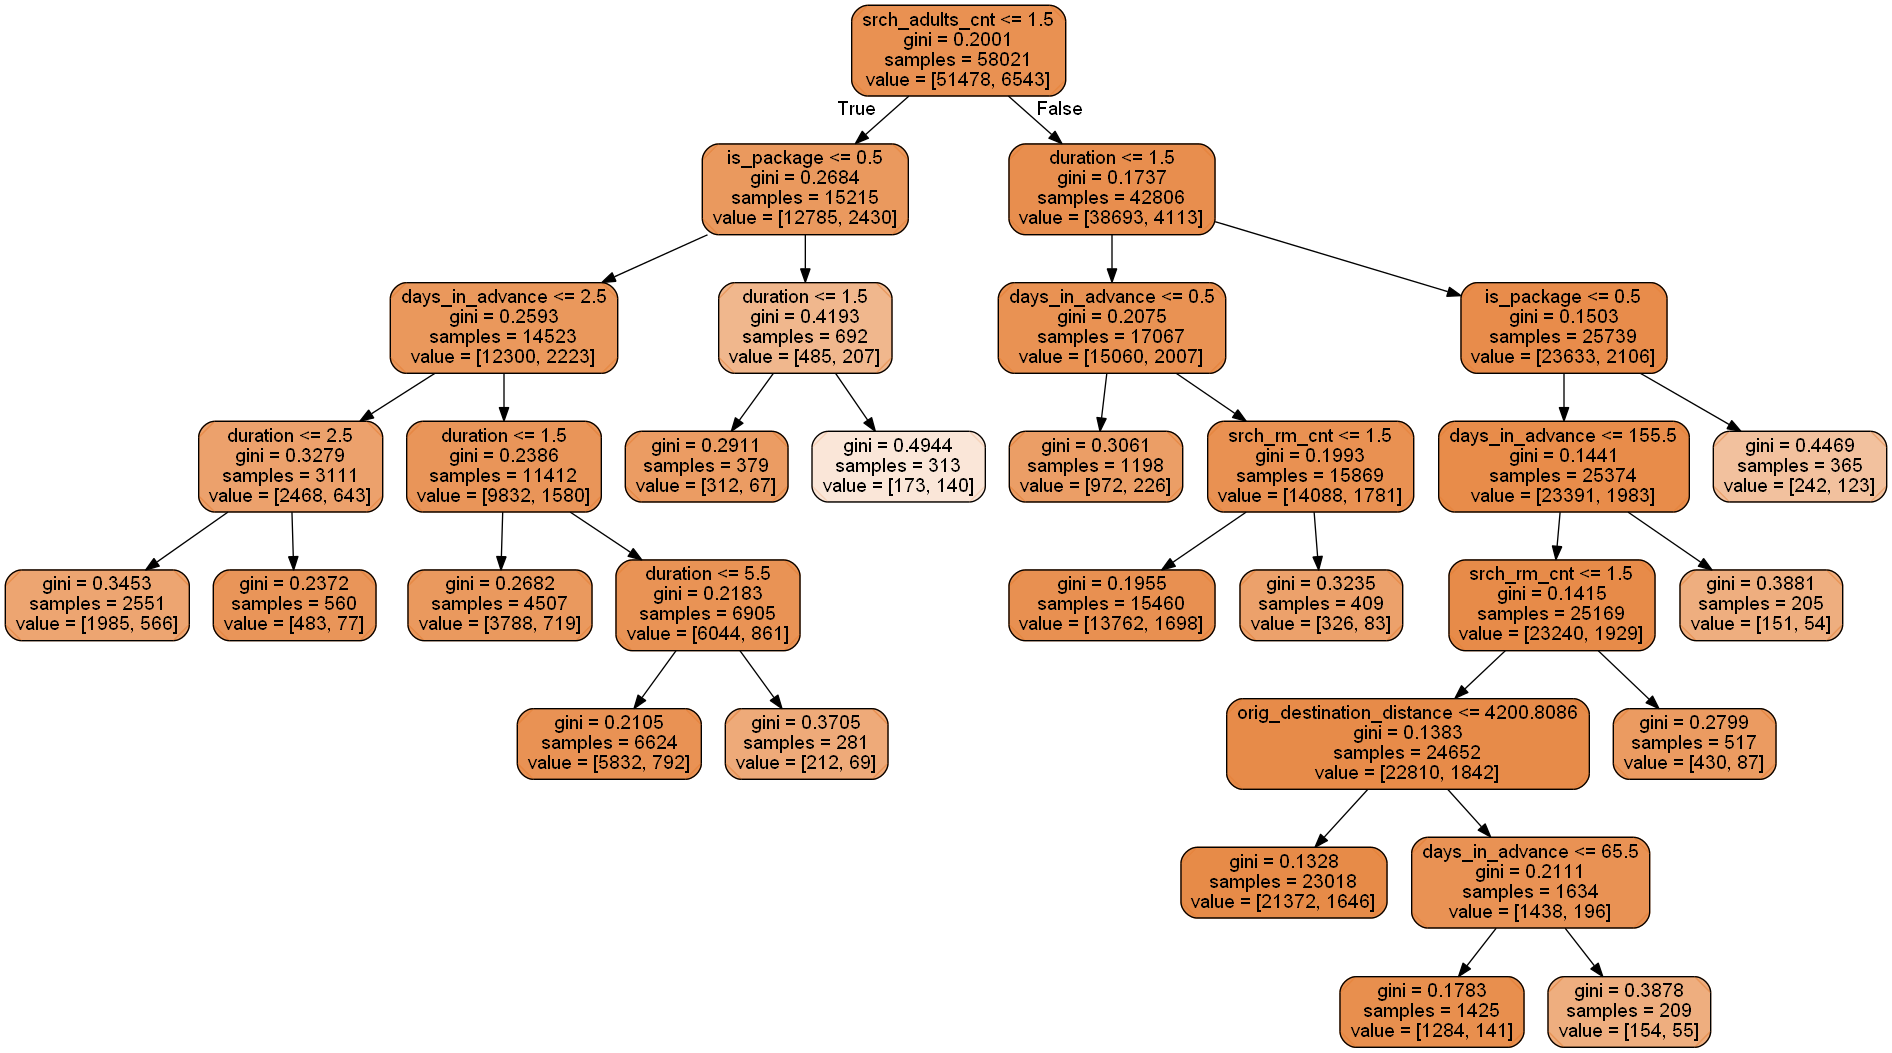

In [114]:
clf2 = tree.DecisionTreeClassifier(max_leaf_nodes=16, min_samples_leaf=200)
clf2 = clf2.fit(cluster_2[num_list], cluster_2['is_booking'])
print(clf2.score(cluster_2[num_list], cluster_2['is_booking']))


feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile','is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
graph1 = print_tree(clf2, features = features)
Image(graph1.create_png())